In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the CSV file into a pandas DataFrame
df_spy = pd.read_csv('https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/refs/heads/Cleaned-Datasets/Cleaned%20Datasets/spy_data_clean.csv')
# Load the CSV file into a pandas DataFrame
df_qqq = pd.read_csv('https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/refs/heads/Cleaned-Datasets/Cleaned%20Datasets/qqq_data_clean.csv')
# Load the CSV file into a pandas DataFrame
df_cl = pd.read_csv('https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/refs/heads/Cleaned-Datasets/Cleaned%20Datasets/cl_data_clean.csv')
# Load the CSV file into a pandas DataFrame
df_gold = pd.read_csv('https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/refs/heads/Cleaned-Datasets/Cleaned%20Datasets/gold_data_clean.csv')
# Load the CSV file into a pandas DataFrame
df_btc = pd.read_csv('https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/refs/heads/Cleaned-Datasets/Cleaned%20Datasets/btc_data_clean.csv')
# Load the CSV file into a pandas DataFrame
df_inflation = pd.read_csv('https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/refs/heads/Cleaned-Datasets/Cleaned%20Datasets/inflation_data_clean.csv')
# Load the CSV file into a pandas DataFrame
df_vix = pd.read_csv('https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/refs/heads/Cleaned-Datasets/Cleaned%20Datasets/vix_data_clean.csv')

# Display the DataFrame
#print('SPY', df_spy.head())
#print('QQQ', df_qqq.head())
#print('Crude Oil', df_cl.head())
#print('Gold', df_gold.head())
#print('Bitcoin', df_btc.head())
#print('Inflation', df_inflation.head())
#print('VIX', df_vix.head())


#Doubling
Bitcoin starts September 17th, 2014 and is the asset with the shortest history.  Let's compare how long it took each asset to double since that date and compare with the inflation index

In [27]:
def time_to_double(df, start_date, column_name):
    # Convert the 'Date' column to datetime format, allowing for mixed date formats
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Check for any invalid date parsing
    if df['Date'].isnull().any():
        print("Warning: Some dates could not be parsed correctly.")

    # Filter the DataFrame to get data from the start date onwards
    df_filtered = df[df['Date'] >= start_date]

    # Ensure that there are valid rows after filtering
    if df_filtered.empty:
        print(f"No data available after {start_date} for column {column_name}.")
        return None, None, None, None, None

    # Get the first available price and date after the start date
    start_price = df_filtered[column_name].iloc[0]
    start_date_available = df_filtered['Date'].iloc[0]

    # Calculate the doubled price
    doubled_price = start_price * 2

    # Find the first row where the price has doubled
    doubled_row = df_filtered[df_filtered[column_name] >= doubled_price]

    if doubled_row.empty:
        return None, None, None, start_price, start_date_available  # No row found where the price doubled

    # Get the first row that meets the condition
    doubled_row = doubled_row.iloc[0]

    # Calculate the number of days from the start date to the doubled price
    days_to_double = (doubled_row['Date'] - start_date).days

    return days_to_double, doubled_row['Date'], doubled_row[column_name], start_price, start_date_available

# Define the start date (September 17th, 2014)
start_date = pd.to_datetime("2014-09-17")

# Convert 'Date' column of each dataset to datetime before calling the function
df_spy['Date'] = pd.to_datetime(df_spy['Date'], errors='coerce')
df_qqq['Date'] = pd.to_datetime(df_qqq['Date'], errors='coerce')
df_cl['Date'] = pd.to_datetime(df_cl['Date'], errors='coerce')
df_gold['Date'] = pd.to_datetime(df_gold['Date'], errors='coerce')
df_btc['Date'] = pd.to_datetime(df_btc['Date'], errors='coerce')

# Calculate the time to double for each asset using 'Close*' as the price column
spy_days, spy_date, spy_price, spy_start_price, spy_start_date = time_to_double(df_spy, start_date, 'Close*')
qqq_days, qqq_date, qqq_price, qqq_start_price, qqq_start_date = time_to_double(df_qqq, start_date, 'Close*')
cl_days, cl_date, cl_price, cl_start_price, cl_start_date = time_to_double(df_cl, start_date, 'Close*')
gold_days, gold_date, gold_price, gold_start_price, gold_start_date = time_to_double(df_gold, start_date, 'Close*')
btc_days, btc_date, btc_price, btc_start_price, btc_start_date = time_to_double(df_btc, start_date, 'Close*')

# Print results for each asset
if spy_days is not None:
    print(f"SPY started at {spy_start_price} on {spy_start_date} and took {spy_days} days to double, reaching {spy_price} on {spy_date}")
else:
    print("SPY did not double in price after September 17, 2014.")

if qqq_days is not None:
    print(f"QQQ started at {qqq_start_price} on {qqq_start_date} and took {qqq_days} days to double, reaching {qqq_price} on {qqq_date}")
else:
    print("QQQ did not double in price after September 17, 2014.")

if cl_days is not None:
    print(f"Crude Oil started at {cl_start_price} on {cl_start_date} and took {cl_days} days to double, reaching {cl_price} on {cl_date}")
else:
    print("Crude Oil did not double in price after September 17, 2014.")

if gold_days is not None:
    print(f"Gold started at {gold_start_price} on {gold_start_date} and took {gold_days} days to double, reaching {gold_price} on {gold_date}")
else:
    print("Gold did not double in price after September 17, 2014.")

if btc_days is not None:
    print(f"Bitcoin started at {btc_start_price} on {btc_start_date} and took {btc_days} days to double, reaching {btc_price} on {btc_date}")
else:
    print("Bitcoin did not double in price after September 17, 2014.")


# CHECK OUT WORK
# SPY doubles to 406.36 on 2021-04-05
spy_double_row = df_spy[df_spy['Close*'] >= 2*spy_start_price].iloc[0]
#print("SPY doubled:")
#print(spy_double_row)

# QQQ doubles to 200.1 on 2019-11-04 (allowing for slight variations)
qqq_double_row = df_qqq[df_qqq['Close*'] >= 2*qqq_start_price].iloc[0]
#print("\nQQQ doubled:")
#print(qqq_double_row)

# Gold doubles to 2498.6 on 2024-08-16
gold_double_row = df_gold[df_gold['Close*'] >= 2*gold_start_price].iloc[0]
#print("\nGold doubled:")
#print(gold_double_row)

# Bitcoin doubles to 921.98 on 2016-12-23
bitcoin_double_row = df_btc[df_btc['Close*'] >= 2*btc_start_price].iloc[0]
#print("\nBitcoin doubled:")
#print(bitcoin_double_row)



<ipython-input-27-42af33de4938>:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_spy['Date'] = pd.to_datetime(df_spy['Date'], errors='coerce')
<ipython-input-27-42af33de4938>:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_qqq['Date'] = pd.to_datetime(df_qqq['Date'], errors='coerce')


SPY started at 200.75 on 2014-09-17 00:00:00 and took 2392 days to double, reaching 406.36 on 2021-04-05 00:00:00
QQQ started at 99.53 on 2014-09-17 00:00:00 and took 1874 days to double, reaching 200.1 on 2019-11-04 00:00:00
Crude Oil did not double in price after September 17, 2014.
Gold started at 1234.4 on 2014-09-17 00:00:00 and took 3621 days to double, reaching 2498.6 on 2024-08-16 00:00:00
Bitcoin started at 457.33 on 2014-09-17 00:00:00 and took 828 days to double, reaching 921.98 on 2016-12-23 00:00:00


#Growth of each asset
As a percentage from September 17th, 2014 to present - October 7th, 2024

In [28]:
# Define the start date (September 17th, 2014)
start_date = '2014-09-17'

# Function to get the 'Close*' value for September 17th, 2014 or the next available date
def get_start_value(df, start_date, column_name):
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    # Filter rows starting from the start date, find the first available row
    df_filtered = df[df['Date'] >= start_date]
    start_value = df_filtered[column_name].iloc[0]  # First value after start date
    return start_value

# Extract the 'Close*' values for each asset on September 17th, 2014 or next available date
spy_start = get_start_value(df_spy, start_date, 'Close*')
qqq_start = get_start_value(df_qqq, start_date, 'Close*')
cl_start = get_start_value(df_cl, start_date, 'Close*')
gold_start = get_start_value(df_gold, start_date, 'Close*')
btc_start = get_start_value(df_btc, start_date, 'Close*')

# Function to get the most recent 'Close*' value
def get_recent_value(df, column_name):
    df['Date'] = pd.to_datetime(df['Date'])  # Ensure the 'Date' column is in datetime format
    df_sorted = df.sort_values(by='Date', ascending=False)  # Sort the DataFrame by date in descending order
    recent_value = df_sorted[column_name].iloc[0]  # Get the first value, which is the most recent
    return recent_value

# Extract the most recent 'Close*' values for each asset
spy_recent = get_recent_value(df_spy, 'Close*')
qqq_recent = get_recent_value(df_qqq, 'Close*')
cl_recent = get_recent_value(df_cl, 'Close*')
gold_recent = get_recent_value(df_gold, 'Close*')
btc_recent = get_recent_value(df_btc, 'Close*')

# Calculate percentage growth for each asset
spy_growth = ((spy_recent - spy_start) / spy_start) * 100
qqq_growth = ((qqq_recent - qqq_start) / qqq_start) * 100
cl_growth = ((cl_recent - cl_start) / cl_start) * 100
gold_growth = ((gold_recent - gold_start) / gold_start) * 100
btc_growth = ((btc_recent - btc_start) / btc_start) * 100

# Print the start values and percentage growth for each asset
print(f"SPY Start Value: {spy_start}, SPY Most Recent Value: {spy_recent}, SPY Percentage Growth: {spy_growth:.2f}%")
print(f"QQQ Start Value: {qqq_start}, QQQ Most Recent Value: {qqq_recent}, QQQ Percentage Growth: {qqq_growth:.2f}%")
print(f"Crude Oil Start Value: {cl_start}, Crude Oil Most Recent Value: {cl_recent}, Crude Oil Percentage Growth: {cl_growth:.2f}%")
print(f"Gold Start Value: {gold_start}, Gold Most Recent Value: {gold_recent}, Gold Percentage Growth: {gold_growth:.2f}%")
print(f"Bitcoin Start Value: {btc_start}, Bitcoin Most Recent Value: {btc_recent}, Bitcoin Percentage Growth: {btc_growth:.2f}%")

SPY Start Value: 200.75, SPY Most Recent Value: 567.8, SPY Percentage Growth: 182.84%
QQQ Start Value: 99.53, QQQ Most Recent Value: 468.02, QQQ Percentage Growth: 370.23%
Crude Oil Start Value: 94.42, Crude Oil Most Recent Value: 77.14, Crude Oil Percentage Growth: -18.30%
Gold Start Value: 1234.4, Gold Most Recent Value: 2644.8, Gold Percentage Growth: 114.26%
Bitcoin Start Value: 457.33, Bitcoin Most Recent Value: 62274.57, Bitcoin Percentage Growth: 13516.99%


#Investing from a recent fixed date
Let's see how each did if we invested January 1st, 2020

SPY Start Value: 324.87, SPY End Value: 567.8, SPY Percentage Growth: 74.78%
QQQ Start Value: 216.16, QQQ End Value: 468.02, QQQ Percentage Growth: 116.52%
Crude Oil Start Value: 61.18, Crude Oil End Value: 77.14, Crude Oil Percentage Growth: 26.09%
Gold Start Value: 1524.5, Gold End Value: 2644.8, Gold Percentage Growth: 73.49%
Bitcoin Start Value: 7200.17, Bitcoin End Value: 62274.57, Bitcoin Percentage Growth: 764.90%


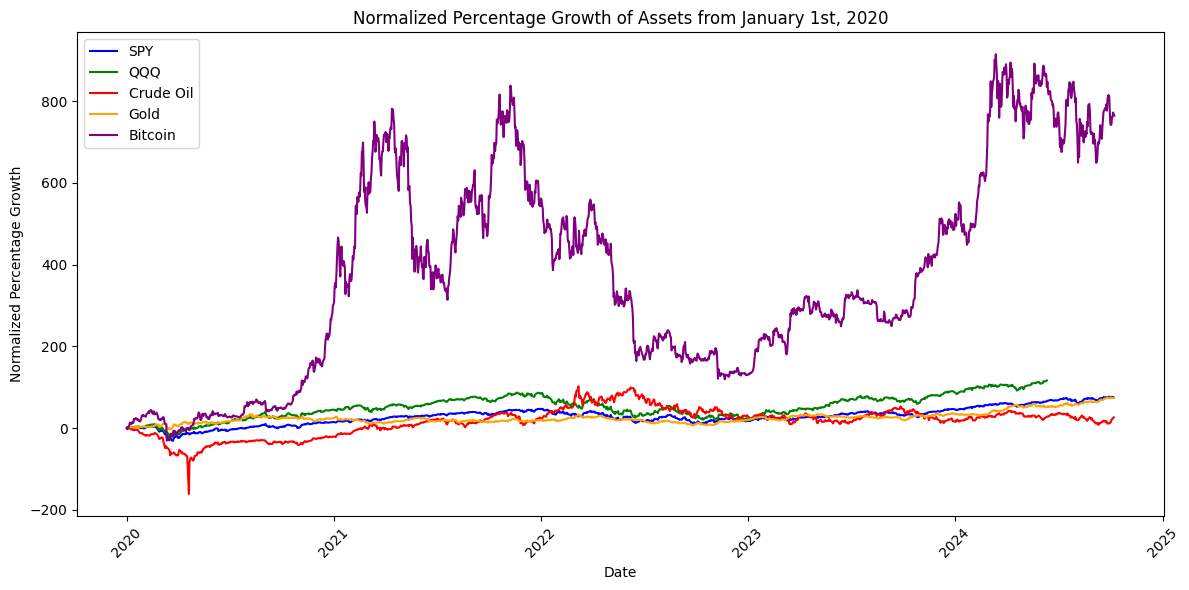

In [30]:
# Define start date for the baseline (January 1st, 2020)
start_date = '2020-01-01'

# Function to calculate percentage growth from the baseline (0%)
def calculate_percentage_growth(df, start_date, column_name):
    # Ensure the 'Date' column is datetime type
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter data to include only rows on or after the start date
    df_filtered = df[df['Date'] >= start_date]

    # Find the price on or after the start date (January 1, 2020)
    start_price_row = df_filtered.iloc[0]
    start_price = start_price_row[column_name]

    # Normalize the price: (current price - start price) / start price * 100 to get the percentage change from the start
    df.loc[df['Date'] >= start_date, 'Normalized'] = ((df.loc[df['Date'] >= start_date, column_name] - start_price) / start_price) * 100

    # Find the most recent price
    recent_price_row = df_filtered.iloc[-1]
    recent_price = recent_price_row[column_name]

    # Calculate the percentage growth
    percentage_growth = ((recent_price - start_price) / start_price) * 100

    return df_filtered, start_price, recent_price, percentage_growth

# Calculate percentage growth for each asset and their respective start, end prices
df_spy_growth, spy_start, spy_recent, spy_growth = calculate_percentage_growth(df_spy, start_date, 'Close*')
df_qqq_growth, qqq_start, qqq_recent, qqq_growth = calculate_percentage_growth(df_qqq, start_date, 'Close*')
df_cl_growth, cl_start, cl_recent, cl_growth = calculate_percentage_growth(df_cl, start_date, 'Close*')
df_gold_growth, gold_start, gold_recent, gold_growth = calculate_percentage_growth(df_gold, start_date, 'Close*')
df_btc_growth, btc_start, btc_recent, btc_growth = calculate_percentage_growth(df_btc, start_date, 'Close*')

# Print start values, end values, and percentage growth for each asset
print(f"SPY Start Value: {spy_start}, SPY End Value: {spy_recent}, SPY Percentage Growth: {spy_growth:.2f}%")
print(f"QQQ Start Value: {qqq_start}, QQQ End Value: {qqq_recent}, QQQ Percentage Growth: {qqq_growth:.2f}%")
print(f"Crude Oil Start Value: {cl_start}, Crude Oil End Value: {cl_recent}, Crude Oil Percentage Growth: {cl_growth:.2f}%")
print(f"Gold Start Value: {gold_start}, Gold End Value: {gold_recent}, Gold Percentage Growth: {gold_growth:.2f}%")
print(f"Bitcoin Start Value: {btc_start}, Bitcoin End Value: {btc_recent}, Bitcoin Percentage Growth: {btc_growth:.2f}%")

# Plotting the normalized results
plt.figure(figsize=(12, 6))

# Plot for SPY
plt.plot(df_spy_growth['Date'], df_spy_growth['Normalized'], label='SPY', color='blue')

# Plot for QQQ
plt.plot(df_qqq_growth['Date'], df_qqq_growth['Normalized'], label='QQQ', color='green')

# Plot for Crude Oil
plt.plot(df_cl_growth['Date'], df_cl_growth['Normalized'], label='Crude Oil', color='red')

# Plot for Gold
plt.plot(df_gold_growth['Date'], df_gold_growth['Normalized'], label='Gold', color='orange')

# Plot for Bitcoin
plt.plot(df_btc_growth['Date'], df_btc_growth['Normalized'], label='Bitcoin', color='purple')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Normalized Percentage Growth')
plt.title('Normalized Percentage Growth of Assets from January 1st, 2020')

# Rotate date labels for better visibility
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

#Bitcoin Wins and Crude Oil loses!

Let's visualize the other assets vs. the inflation index from Jan 1st, 2020 to Jan 1st, 2024.


SPY Start Value: 324.87, SPY End Value: 475.31, SPY Percentage Growth: 46.31%
QQQ Start Value: 216.16, QQQ End Value: 409.52, QQQ Percentage Growth: 89.45%
Gold Start Value: 1524.50, Gold End Value: 2062.40, Gold Percentage Growth: 35.28%
Inflation Index Start Value: 258.80, Inflation Index End Value: 314.40, Inflation Percentage Growth: 21.48%


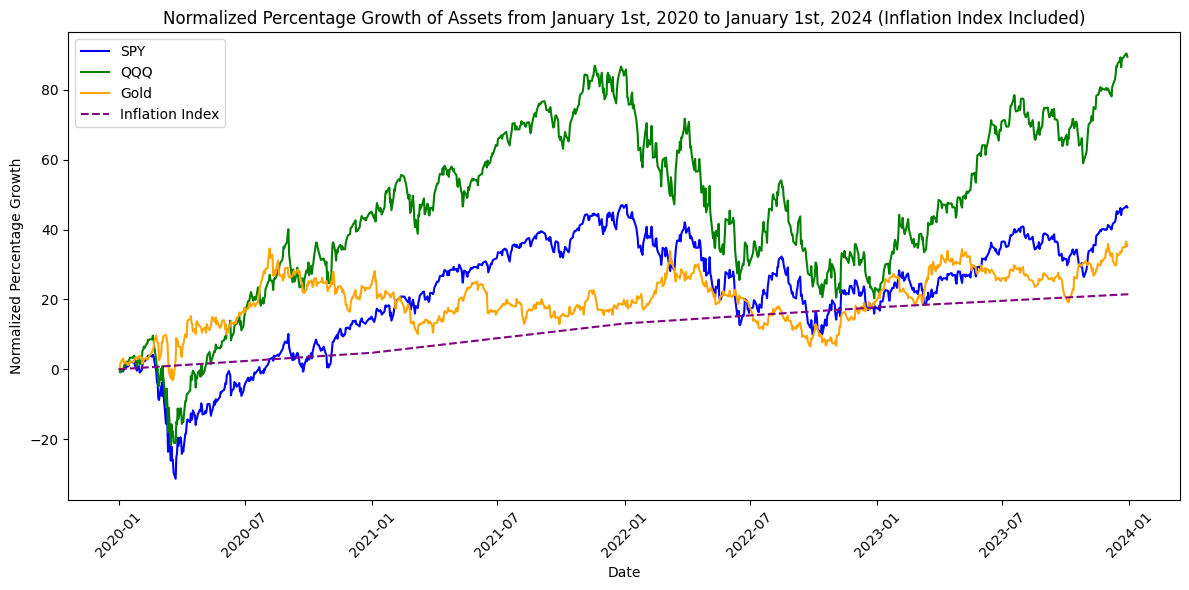

SPY Nominal Return: 24.82%
QQQ Nominal Return: 67.97%
Gold Nominal Return: 13.80%


In [31]:
# Function to calculate percentage growth from a specific baseline value
def calculate_percentage_growth_from_baseline(df, baseline_year, column_name):
    # Ensure the 'Date' column is datetime type
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract the value for the baseline year (2020)
    baseline_value = df[df['Date'].dt.year == baseline_year][column_name].values[0]

    # Normalize the values based on the baseline year
    df['Normalized'] = ((df[column_name] - baseline_value) / baseline_value) * 100

    # Find the most recent value
    recent_value = df.iloc[-1][column_name]

    # Calculate the percentage growth from the baseline year
    percentage_growth = ((recent_value - baseline_value) / baseline_value) * 100

    return df, baseline_value, recent_value, percentage_growth

# Normalize the inflation index using 2020 as the baseline
df_inflation_growth, inflation_start, inflation_recent, inflation_growth = calculate_percentage_growth_from_baseline(df_inflation, 2020, 'Index')

# Filter all datasets to only include data from 2020 onward and up to 2024-01-01
df_spy_growth = df_spy_growth[(df_spy_growth['Date'] >= pd.to_datetime('2020-01-01')) & (df_spy_growth['Date'] <= pd.to_datetime('2024-01-01'))]
df_qqq_growth = df_qqq_growth[(df_qqq_growth['Date'] >= pd.to_datetime('2020-01-01')) & (df_qqq_growth['Date'] <= pd.to_datetime('2024-01-01'))]
df_gold_growth = df_gold_growth[(df_gold_growth['Date'] >= pd.to_datetime('2020-01-01')) & (df_gold_growth['Date'] <= pd.to_datetime('2024-01-01'))]
df_inflation_growth = df_inflation_growth[(df_inflation_growth['Date'] >= pd.to_datetime('2020-01-01')) & (df_inflation_growth['Date'] <= pd.to_datetime('2024-01-01'))]

# Calculate percentage growth for SPY, QQQ, and Gold
spy_growth = ((df_spy_growth['Close*'].iloc[-1] - df_spy_growth['Close*'].iloc[0]) / df_spy_growth['Close*'].iloc[0]) * 100
qqq_growth = ((df_qqq_growth['Close*'].iloc[-1] - df_qqq_growth['Close*'].iloc[0]) / df_qqq_growth['Close*'].iloc[0]) * 100
gold_growth = ((df_gold_growth['Close*'].iloc[-1] - df_gold_growth['Close*'].iloc[0]) / df_gold_growth['Close*'].iloc[0]) * 100

# Print start values, end values, and percentage growth for each asset and inflation index
print(f"SPY Start Value: {df_spy_growth['Close*'].iloc[0]:.2f}, SPY End Value: {df_spy_growth['Close*'].iloc[-1]:.2f}, SPY Percentage Growth: {spy_growth:.2f}%")
print(f"QQQ Start Value: {df_qqq_growth['Close*'].iloc[0]:.2f}, QQQ End Value: {df_qqq_growth['Close*'].iloc[-1]:.2f}, QQQ Percentage Growth: {qqq_growth:.2f}%")
print(f"Gold Start Value: {df_gold_growth['Close*'].iloc[0]:.2f}, Gold End Value: {df_gold_growth['Close*'].iloc[-1]:.2f}, Gold Percentage Growth: {gold_growth:.2f}%")
print(f"Inflation Index Start Value: {inflation_start:.2f}, Inflation Index End Value: {inflation_recent:.2f}, Inflation Percentage Growth: {inflation_growth:.2f}%")

# Plotting the normalized results without Crude Oil and Bitcoin, ending on 2024-01-01
plt.figure(figsize=(12, 6))

# Plot for SPY
plt.plot(df_spy_growth['Date'], df_spy_growth['Normalized'], label='SPY', color='blue')

# Plot for QQQ
plt.plot(df_qqq_growth['Date'], df_qqq_growth['Normalized'], label='QQQ', color='green')

# Plot for Gold
plt.plot(df_gold_growth['Date'], df_gold_growth['Normalized'], label='Gold', color='orange')

# Plot for Inflation Index
plt.plot(df_inflation_growth['Date'], df_inflation_growth['Normalized'], label='Inflation Index', color='purple', linestyle='--')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Normalized Percentage Growth')
plt.title('Normalized Percentage Growth of Assets from January 1st, 2020 to January 1st, 2024 (Inflation Index Included)')

# Rotate date labels for better visibility
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Function to calculate the nominal rate of return (percentage growth - inflation growth)
def calculate_nominal_rate_of_return(asset_growth, inflation_growth):
    return asset_growth - inflation_growth

# Calculate the nominal rate of return for each asset over the period
spy_nominal_return = calculate_nominal_rate_of_return(spy_growth, inflation_growth)
qqq_nominal_return = calculate_nominal_rate_of_return(qqq_growth, inflation_growth)
gold_nominal_return = calculate_nominal_rate_of_return(gold_growth, inflation_growth)

# Print nominal returns for each asset
print(f"SPY Nominal Return: {spy_nominal_return:.2f}%")
print(f"QQQ Nominal Return: {qqq_nominal_return:.2f}%")
print(f"Gold Nominal Return: {gold_nominal_return:.2f}%")


#Let's find all the declines in each asset now:
#SPY, QQQ, CL, GOLD, and BTC

Printed declines - highlighted on the the chart

Declines > 10% in SPY:
Local High: 48.31 on 1994-01-31, Local Low: 43.34 on 1994-04-04, Maximum Decline: 10.29%, Plunge Duration: 63 days, Time to Recovery: 305 days, Decline Start Date: 1994-01-31, Decline End Date: 1995-02-03
Local High: 68.5 on 1996-06-06, Local Low: 60.38 on 1996-07-16, Maximum Decline: 11.85%, Plunge Duration: 40 days, Time to Recovery: 58 days, Decline Start Date: 1996-06-06, Decline End Date: 1996-09-12
Local High: 82.0 on 1997-02-19, Local Low: 73.31 on 1997-04-14, Maximum Decline: 10.60%, Plunge Duration: 54 days, Time to Recovery: 18 days, Decline Start Date: 1997-02-19, Decline End Date: 1997-05-02
Local High: 98.5 on 1997-10-07, Local Low: 84.38 on 1997-10-28, Maximum Decline: 14.34%, Plunge Duration: 21 days, Time to Recovery: 35 days, Decline Start Date: 1997-10-07, Decline End Date: 1997-12-02
Local High: 119.23 on 1998-07-20, Local Low: 92.22 on 1998-10-08, Maximum Decline: 22.65%, Plunge Duration: 80 days, Time to Recovery: 43 days, Decline Start Date:

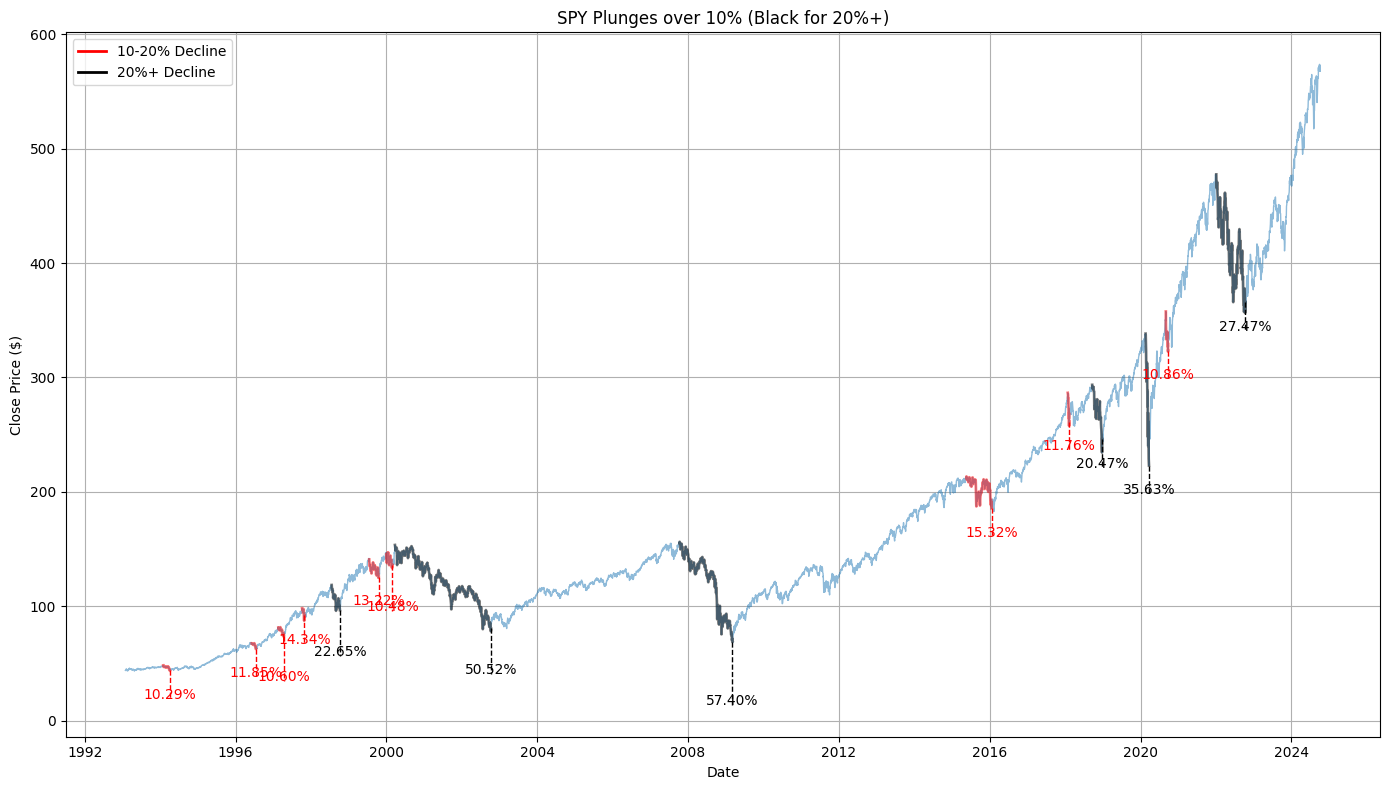

Declines > 10% in QQQ:
Local High: 56.25 on 1999-04-07, Local Low: 48.84 on 1999-04-20, Maximum Decline: 13.17%, Plunge Duration: 13 days, Time to Recovery: 3 days, Decline Start Date: 1999-04-07, Decline End Date: 1999-04-23
Local High: 57.28 on 1999-04-27, Local Low: 48.94 on 1999-05-26, Maximum Decline: 14.56%, Plunge Duration: 29 days, Time to Recovery: 34 days, Decline Start Date: 1999-04-27, Decline End Date: 1999-06-29
Local High: 61.72 on 1999-07-16, Local Low: 52.94 on 1999-08-10, Maximum Decline: 14.23%, Plunge Duration: 25 days, Time to Recovery: 14 days, Decline Start Date: 1999-07-16, Decline End Date: 1999-08-24
Local High: 64.95 on 1999-10-12, Local Low: 57.41 on 1999-10-18, Maximum Decline: 11.61%, Plunge Duration: 6 days, Time to Recovery: 10 days, Decline Start Date: 1999-10-12, Decline End Date: 1999-10-28
Local High: 96.19 on 2000-01-03, Local Low: 79.75 on 2000-01-06, Maximum Decline: 17.09%, Plunge Duration: 3 days, Time to Recovery: 13 days, Decline Start Date: 2

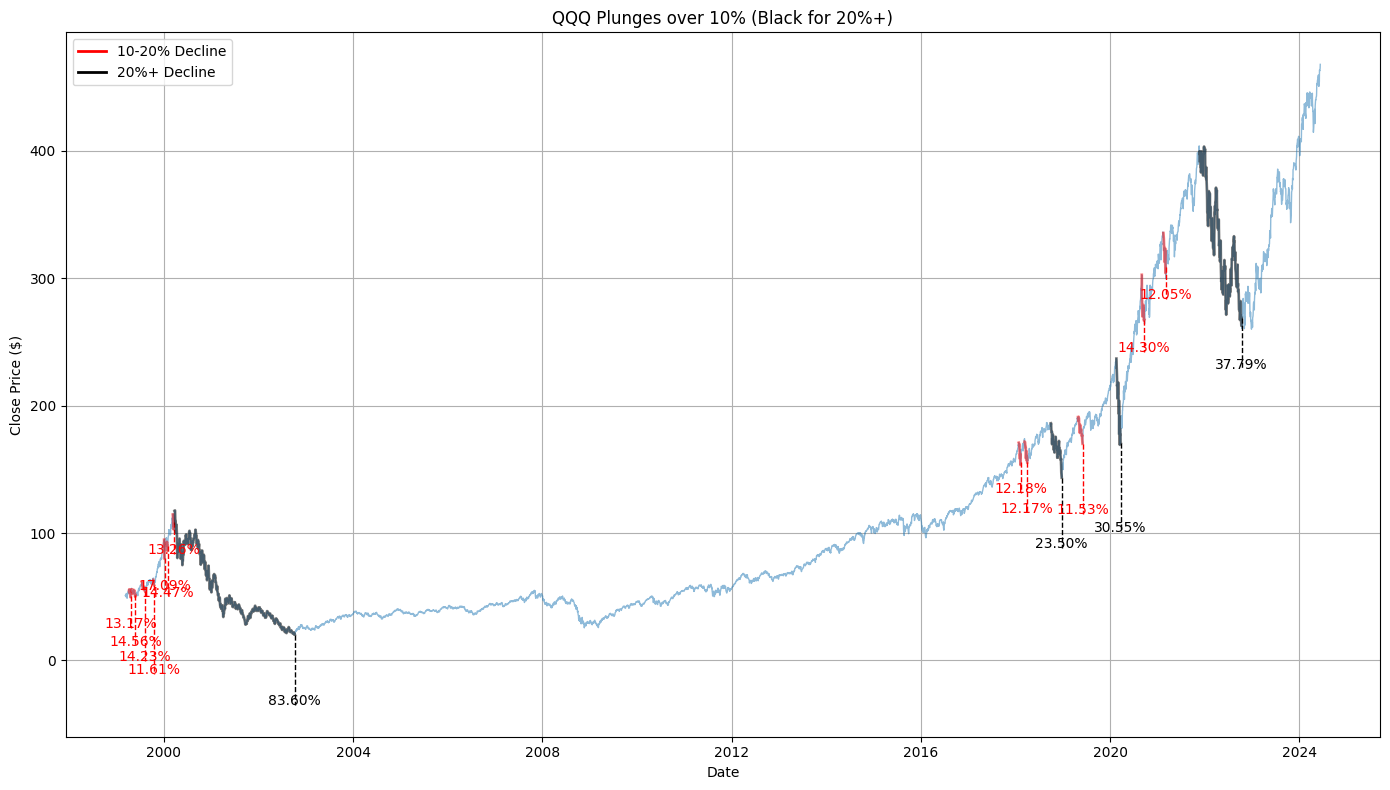

Declines > 10% in Crude Oil:
Local High: 37.8 on 2000-09-20, Local Low: 16.7 on 2001-11-19, Maximum Decline: 55.82%, Plunge Duration: 425 days, Time to Recovery: 463 days, Decline Start Date: 2000-09-20, Decline End Date: 2003-02-25
Local High: 39.99 on 2003-02-27, Local Low: 25.04 on 2003-04-29, Maximum Decline: 37.38%, Plunge Duration: 61 days, Time to Recovery: 373 days, Decline Start Date: 2003-02-27, Decline End Date: 2004-05-06
Local High: 42.45 on 2004-06-02, Local Low: 35.52 on 2004-06-30, Maximum Decline: 16.33%, Plunge Duration: 28 days, Time to Recovery: 27 days, Decline Start Date: 2004-06-02, Decline End Date: 2004-07-27
Local High: 49.4 on 2004-08-20, Local Low: 41.3 on 2004-08-30, Maximum Decline: 16.40%, Plunge Duration: 10 days, Time to Recovery: 25 days, Decline Start Date: 2004-08-20, Decline End Date: 2004-09-24
Local High: 55.67 on 2004-10-25, Local Low: 40.25 on 2004-12-10, Maximum Decline: 27.70%, Plunge Duration: 46 days, Time to Recovery: 95 days, Decline Start

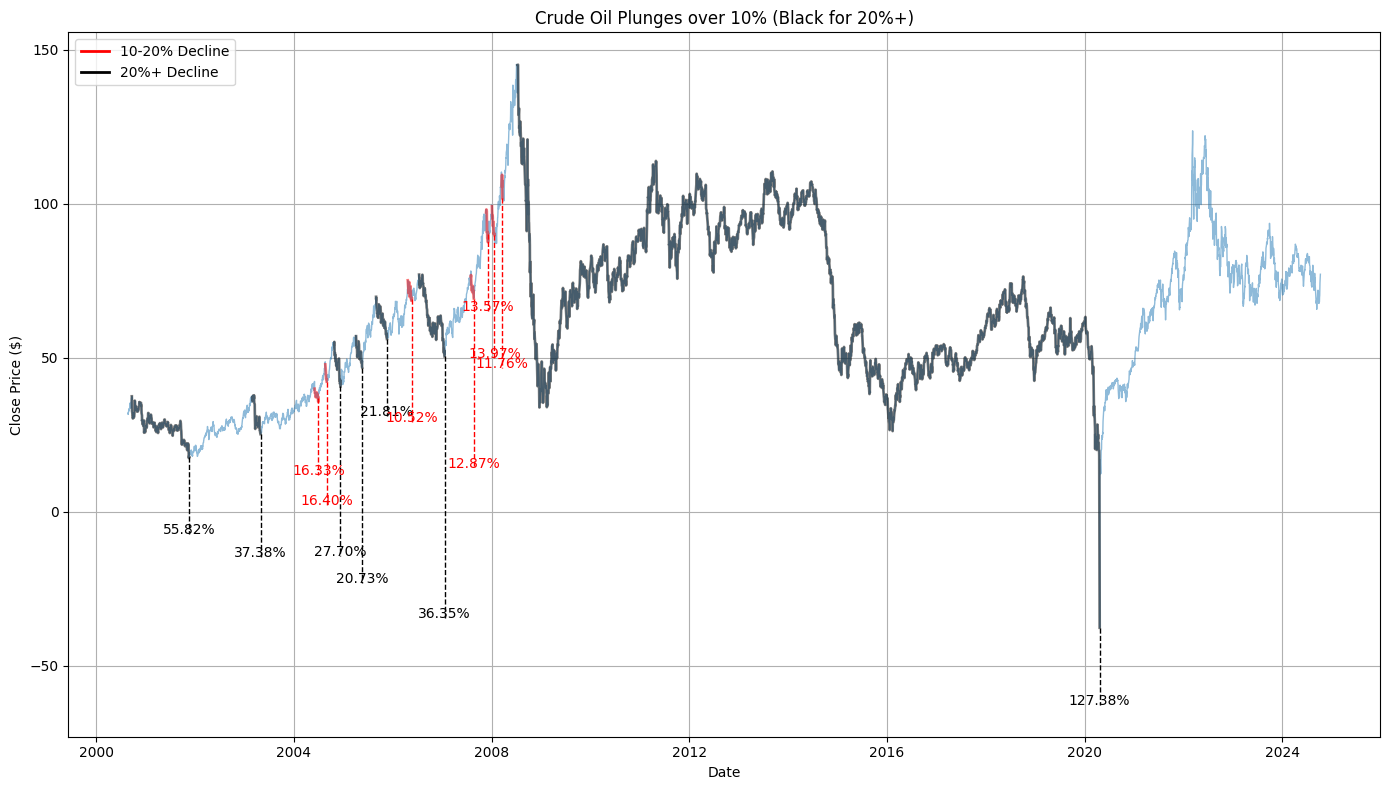

Declines > 10% in Gold:
Local High: 388.9 on 2003-02-05, Local Low: 319.3 on 2003-04-07, Maximum Decline: 17.90%, Plunge Duration: 61 days, Time to Recovery: 199 days, Decline Start Date: 2003-02-05, Decline End Date: 2003-10-23
Local High: 432.0 on 2004-04-01, Local Low: 375.8 on 2004-05-18, Maximum Decline: 13.01%, Plunge Duration: 47 days, Time to Recovery: 170 days, Decline Start Date: 2004-04-01, Decline End Date: 2004-11-04
Local High: 456.5 on 2004-12-02, Local Low: 410.1 on 2005-02-08, Maximum Decline: 10.16%, Plunge Duration: 68 days, Time to Recovery: 219 days, Decline Start Date: 2004-12-02, Decline End Date: 2005-09-15
Local High: 723.0 on 2006-05-11, Local Low: 555.0 on 2006-06-14, Maximum Decline: 23.24%, Plunge Duration: 34 days, Time to Recovery: 461 days, Decline Start Date: 2006-05-11, Decline End Date: 2007-09-18
Local High: 1014.6 on 2008-03-17, Local Low: 681.0 on 2008-10-24, Maximum Decline: 32.88%, Plunge Duration: 221 days, Time to Recovery: 326 days, Decline St

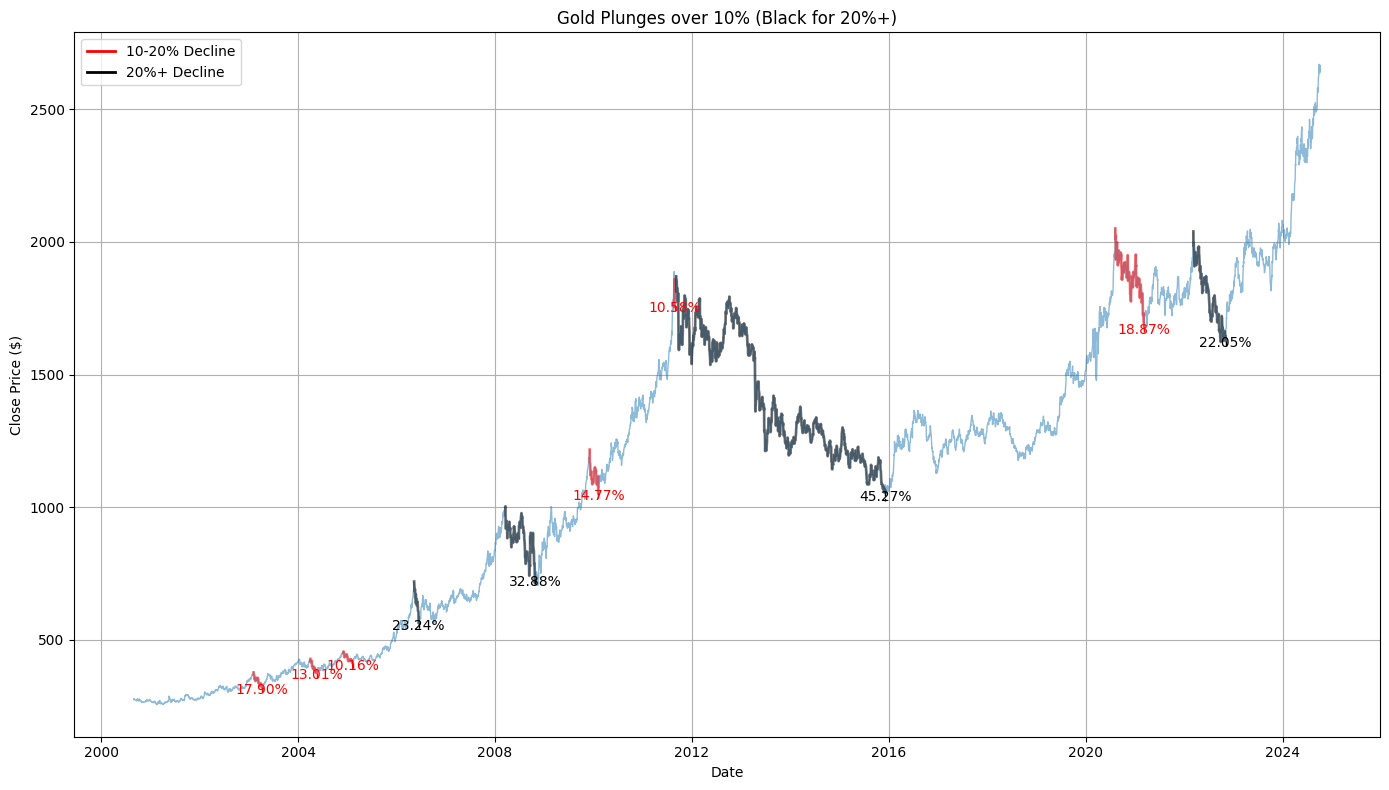

Declines > 10% in Bitcoin:
Local High: 456.86 on 2014-09-18, Local Low: 289.3 on 2014-10-05, Maximum Decline: 36.68%, Plunge Duration: 17 days, Time to Recovery: 0 days, Decline Start Date: 2014-09-18, Decline End Date: 2014-10-05
Local High: 457.09 on 2014-11-13, Local Low: 171.51 on 2015-01-14, Maximum Decline: 62.48%, Plunge Duration: 62 days, Time to Recovery: 0 days, Decline Start Date: 2014-11-13, Decline End Date: 2015-01-14
Local High: 495.56 on 2015-11-04, Local Low: 301.0 on 2015-11-11, Maximum Decline: 39.26%, Plunge Duration: 7 days, Time to Recovery: 198 days, Decline Start Date: 2015-11-04, Decline End Date: 2016-05-27
Local High: 777.99 on 2016-06-18, Local Low: 531.33 on 2016-08-02, Maximum Decline: 31.70%, Plunge Duration: 45 days, Time to Recovery: 121 days, Decline Start Date: 2016-06-18, Decline End Date: 2016-12-01
Local High: 1191.1 on 2017-01-05, Local Low: 755.76 on 2017-01-12, Maximum Decline: 36.55%, Plunge Duration: 7 days, Time to Recovery: 42 days, Decline 

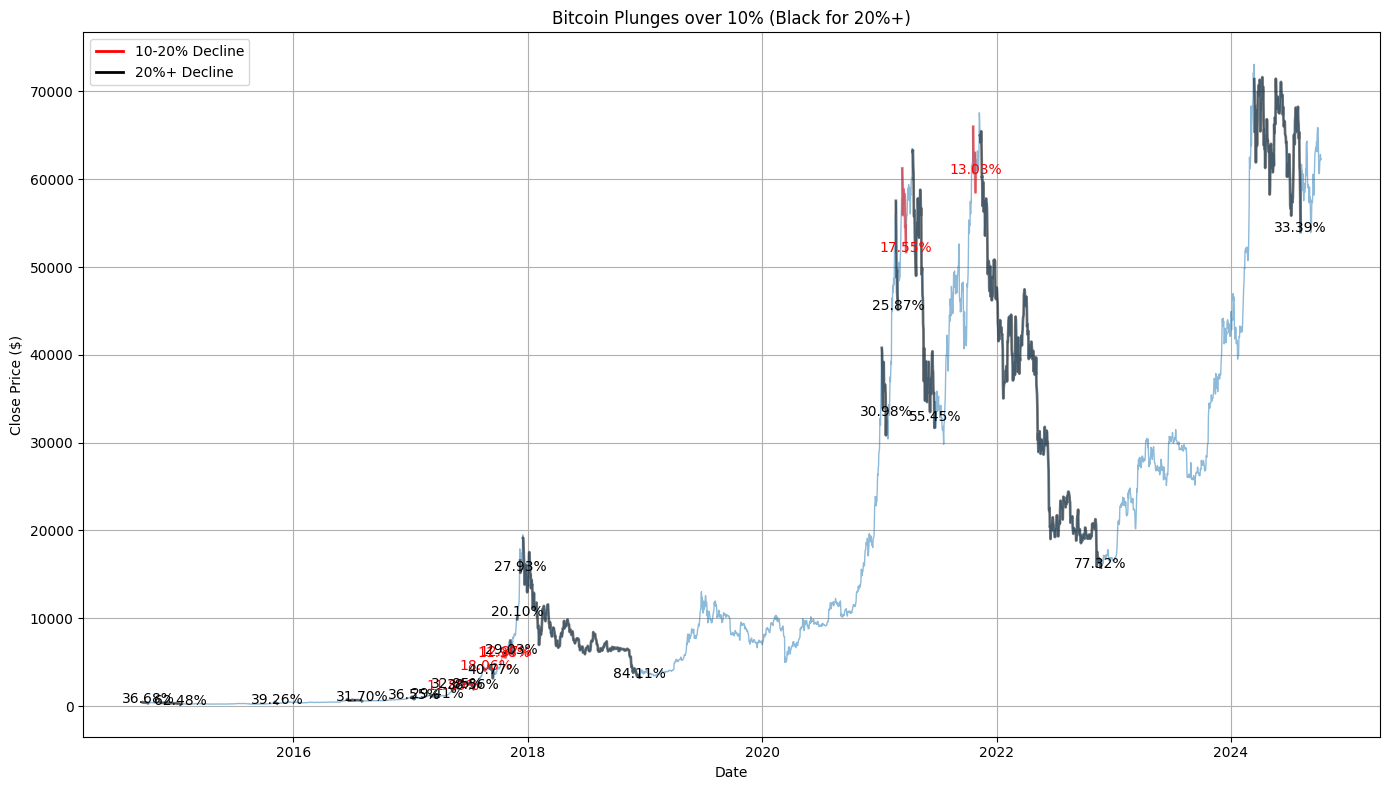

In [32]:
# Ensure 'Date' is in datetime format for all datasets
datasets = [df_spy, df_qqq, df_cl, df_gold, df_btc]
for df in datasets:
    df['Date'] = pd.to_datetime(df['Date'])

def find_declines_over_10(df, high_column, low_column, min_decline_percentage=10):
    declines = []  # To store the declines

    peak = None  # Last all-time high
    peak_date = None  # Date of last all-time high
    peak_index = None  # Index of the last all-time high
    decline_start_index = None  # To track when the decline starts
    decline_max = None  # Max decline seen so far
    decline_end_index = None  # To track the end of the decline
    min_low_in_decline = None  # To track the lowest point during the decline
    plunge_end_index = None  # To track the end of the plunge (lowest point)
    min_low_date = None  # To track the date of the minimum low

    for i in range(1, len(df)):
        current_row = df.iloc[i]

        # If the current row has a new high, update the all-time high and reset the decline tracking
        if peak is None or current_row[high_column] > peak:
            # If we were tracking a decline, save it and reset tracking
            if peak is not None and decline_max is not None and decline_start_index is not None:
                # Ensure the indices are valid integers before accessing
                if isinstance(decline_end_index, int) and isinstance(plunge_end_index, int):
                    # Calculate time to recovery (from low of decline to recovery)
                    time_to_recovery = (df.iloc[decline_end_index]['Date'] - df.iloc[plunge_end_index]['Date']).days
                    # Calculate plunge duration (from peak to low)
                    plunge_duration = (df.iloc[plunge_end_index]['Date'] - df.iloc[peak_index]['Date']).days
                    declines.append({
                        'Local High': peak,
                        'Local High Date': peak_date,
                        'Maximum Decline': decline_max,
                        'Decline Start Date': df.iloc[peak_index]['Date'],  # Start date is the peak date
                        'Decline End Date': df.iloc[decline_end_index]['Date'],
                        'Time to Recovery (days)': time_to_recovery,
                        'Plunge Duration (days)': plunge_duration,
                        'Local Low at End of Decline': min_low_in_decline,
                        'Local Low Date': min_low_date  # Add date of the low
                    })
            # Reset decline tracking after a new peak
            peak = current_row[high_column]
            peak_date = current_row['Date']
            peak_index = i
            decline_start_index = None  # Reset start index for the new peak
            decline_max = None
            decline_end_index = None
            min_low_in_decline = None  # Reset the min low for the new peak
            plunge_end_index = None  # Reset plunge end index for the new peak
            min_low_date = None  # Reset min low date for the new peak

        # If we are in the middle of a decline (after the local high)
        elif peak is not None and current_row[low_column] < peak * (1 - min_decline_percentage / 100):
            # Start tracking the decline when it first drops below the threshold
            if decline_start_index is None:
                decline_start_index = i
                decline_max = (peak - current_row[low_column]) / peak * 100
                min_low_in_decline = current_row[low_column]  # Initialize the minimum low during the decline
                plunge_end_index = i  # Mark the start of the plunge
                min_low_date = current_row['Date']  # Record the date of the low point

            # Update the minimum low during the decline if a lower value is found
            if current_row[low_column] < min_low_in_decline:
                min_low_in_decline = current_row[low_column]
                min_low_date = current_row['Date']  # Update low date if new low is found
                plunge_end_index = i  # Update plunge end index if new low is found

            # If the decline is new or growing, update the maximum decline
            if current_row[low_column] < peak * (1 - decline_max / 100):
                decline_max = (peak - current_row[low_column]) / peak * 100
                decline_end_index = i

        # Continue updating the decline until it ends
        elif decline_start_index is not None and current_row[low_column] >= peak * (1 - decline_max / 100):
            decline_end_index = i

    # After the loop, check if there was a final recorded decline
    if peak is not None and decline_max is not None and decline_start_index is not None and decline_start_index != decline_end_index:
        # Ensure the indices are valid integers before accessing
        if isinstance(decline_end_index, int) and isinstance(plunge_end_index, int):
            # Calculate time to recovery and plunge duration for the final decline
            time_to_recovery = (df.iloc[decline_end_index]['Date'] - df.iloc[plunge_end_index]['Date']).days
            plunge_duration = (df.iloc[plunge_end_index]['Date'] - df.iloc[peak_index]['Date']).days
            declines.append({
                'Local High': peak,
                'Local High Date': peak_date,
                'Maximum Decline': decline_max,
                'Decline Start Date': df.iloc[peak_index]['Date'],  # Start date is the peak date
                'Decline End Date': df.iloc[decline_end_index]['Date'],
                'Time to Recovery (days)': time_to_recovery,
                'Plunge Duration (days)': plunge_duration,
                'Local Low at End of Decline': min_low_in_decline,
                'Local Low Date': min_low_date  # Add date of the low
            })

    return declines

def plot_with_plunges_and_labels(df, declines, dataset_name, figsize=(14, 8)):
    plt.figure(figsize=figsize)

    # Plot the dataset's close price as a line
    plt.plot(df['Date'], df['Close*'], label=f'{dataset_name} Close', linewidth=1, alpha=0.5)

    # List to store positions of already placed labels to avoid overlaps
    placed_labels_y = []

    # Function to adjust the y-position to avoid overlap
    def adjust_y_position(y, placed_labels_y, min_distance=15):
        for existing_y in placed_labels_y:
            if abs(existing_y - y) < min_distance:
                y -= min_distance
        placed_labels_y.append(y)  # Store this y-coordinate to track future labels
        return y

    # Highlight the plunges in red or black and add percentage labels with connecting lines
    for decline in declines:
        peak_index = df[df['Date'] == decline['Local High Date']].index[0]
        min_low_index = df[df['Date'] == decline['Local Low Date']].index[0]

        peak_value = decline['Local High']
        min_low_value = decline['Local Low at End of Decline']
        percentage_decline = (peak_value - min_low_value) / peak_value * 100

        # Determine color: black if decline > 20%, otherwise red
        line_color = 'black' if percentage_decline > 20 else 'red'

        # Plot the plunge segment with the determined color
        plt.plot(df['Date'].iloc[peak_index:min_low_index+1],
                 df['Close*'].iloc[peak_index:min_low_index+1],
                 color=line_color, linewidth=2, alpha=0.5)

        # Calculate the initial y-position for the label
        label_y = df['Close*'].iloc[min_low_index] - 25

        # Adjust the y-position to avoid overlap
        label_y = adjust_y_position(label_y, placed_labels_y)

        # Add a label above the line showing the percentage decline
        plt.text(df['Date'].iloc[min_low_index],
                 label_y,
                 f"{percentage_decline:.2f}%",
                 color=line_color,
                 fontsize=10,
                 horizontalalignment='center')

        # Add a line connecting the label to the low point of the plunge
        plt.plot([df['Date'].iloc[min_low_index], df['Date'].iloc[min_low_index]],
                 [df['Close*'].iloc[min_low_index], label_y],
                 color=line_color, linewidth=1, linestyle='--')

    # Add a custom legend for 10-20% and 20%+ declines
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='red', lw=2, label='10-20% Decline'),
                    Line2D([0], [0], color='black', lw=2, label='20%+ Decline')]

    plt.legend(handles=custom_lines, loc='upper left')  # Set legend to top-left

    plt.title(f"{dataset_name} Plunges over 10% (Black for 20%+)")
    plt.xlabel('Date')
    plt.ylabel('Close Price ($)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Iterate over all datasets and plot for declines over 10%
datasets_info = [
    ('SPY', df_spy, 'High', 'Low'),
    ('QQQ', df_qqq, 'High', 'Low'),
    ('Crude Oil', df_cl, 'High', 'Low'),
    ('Gold', df_gold, 'High', 'Low'),
    ('Bitcoin', df_btc, 'High', 'Low')
]

def print_declines_results(declines, dataset_name):
    if declines:
        print(f"Declines > 10% in {dataset_name}:")
        for decline in declines:
            print(f"Local High: {decline['Local High']} on {decline['Local High Date'].date()}, "
                  f"Local Low: {decline['Local Low at End of Decline']} on {decline['Local Low Date'].date()}, "
                  f"Maximum Decline: {decline['Maximum Decline']:.2f}%, "
                  f"Plunge Duration: {decline['Plunge Duration (days)']} days, "
                  f"Time to Recovery: {decline['Time to Recovery (days)']} days, "
                  f"Decline Start Date: {decline['Decline Start Date'].date()}, "
                  f"Decline End Date: {decline['Decline End Date'].date()}")
    else:
        print(f"No declines > 10% found in {dataset_name}.")

for dataset_name, df, high_column, low_column in datasets_info:
    declines = find_declines_over_10(df, high_column, low_column)
    print_declines_results(declines, dataset_name)
    plot_with_plunges_and_labels(df, declines, dataset_name)


#Time in the market, or timing the market???
We have $100,000 to invest, but the market is at an all time high.  What should we do?

First, Let's find the all time highs (ATHs)

In [33]:
def find_all_time_highs(df, high_column):
    all_time_highs = []  # To store dates and values of all-time highs

    current_all_time_high = float('-inf')  # Initialize as negative infinity

    # Iterate through the dataset row by row
    for i in range(len(df)):
        current_row = df.iloc[i]
        current_high = current_row[high_column]

        # Check if the current high is greater than the previous all-time high
        if current_high > current_all_time_high:
            current_all_time_high = current_high
            all_time_highs.append({
                'Date': current_row['Date'],
                'All-Time High': current_high
            })

    return all_time_highs

def print_all_time_highs(all_time_highs, dataset_name):
    print(f"All-Time Highs for {dataset_name}:")
    for record in all_time_highs:
        print(f"Date: {record['Date']}, All-Time High: {record['All-Time High']}")
    print("\n")

# Example usage for multiple datasets
datasets_info = [
    ('SPY', df_spy, 'High'),
    ('QQQ', df_qqq, 'High'),
    ('Crude Oil', df_cl, 'High'),
    ('Gold', df_gold, 'High'),
    ('Bitcoin', df_btc, 'High')
]

for dataset_name, df, high_column in datasets_info:
    all_time_highs = find_all_time_highs(df, high_column)
    #print_all_time_highs(all_time_highs, dataset_name)

#Visualize the ATHs

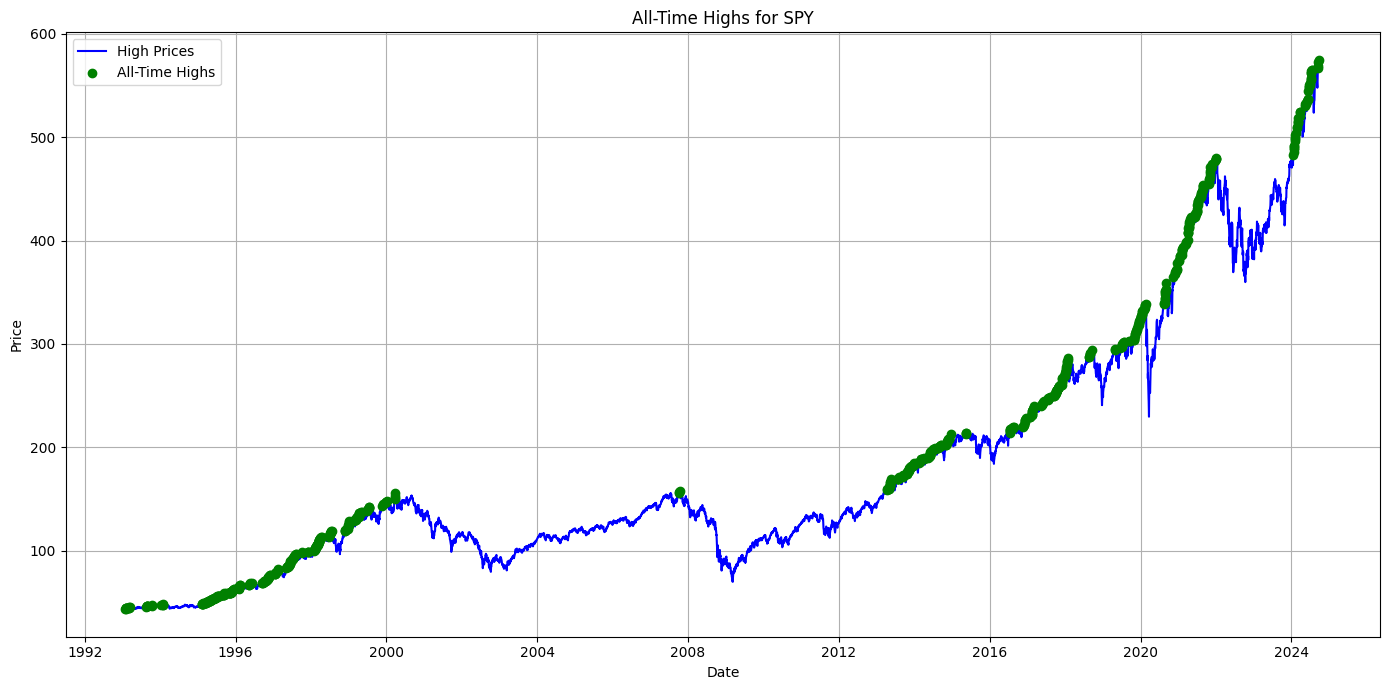

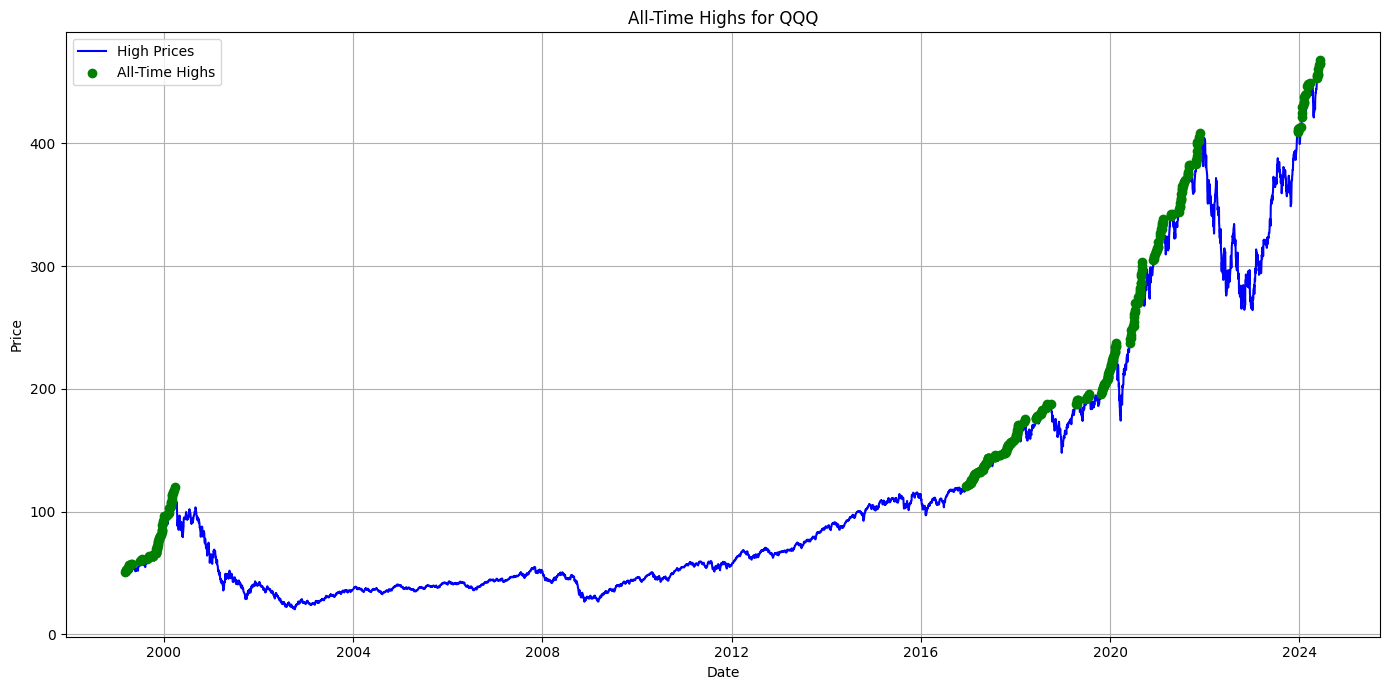

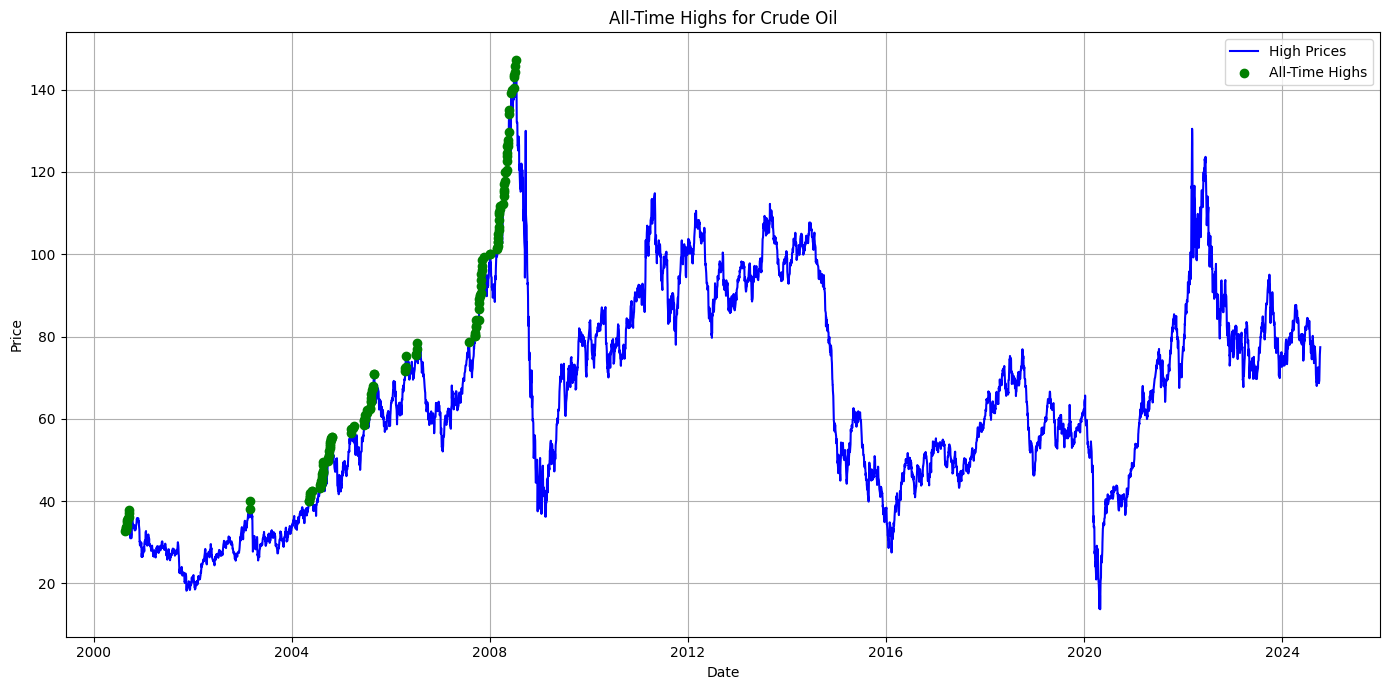

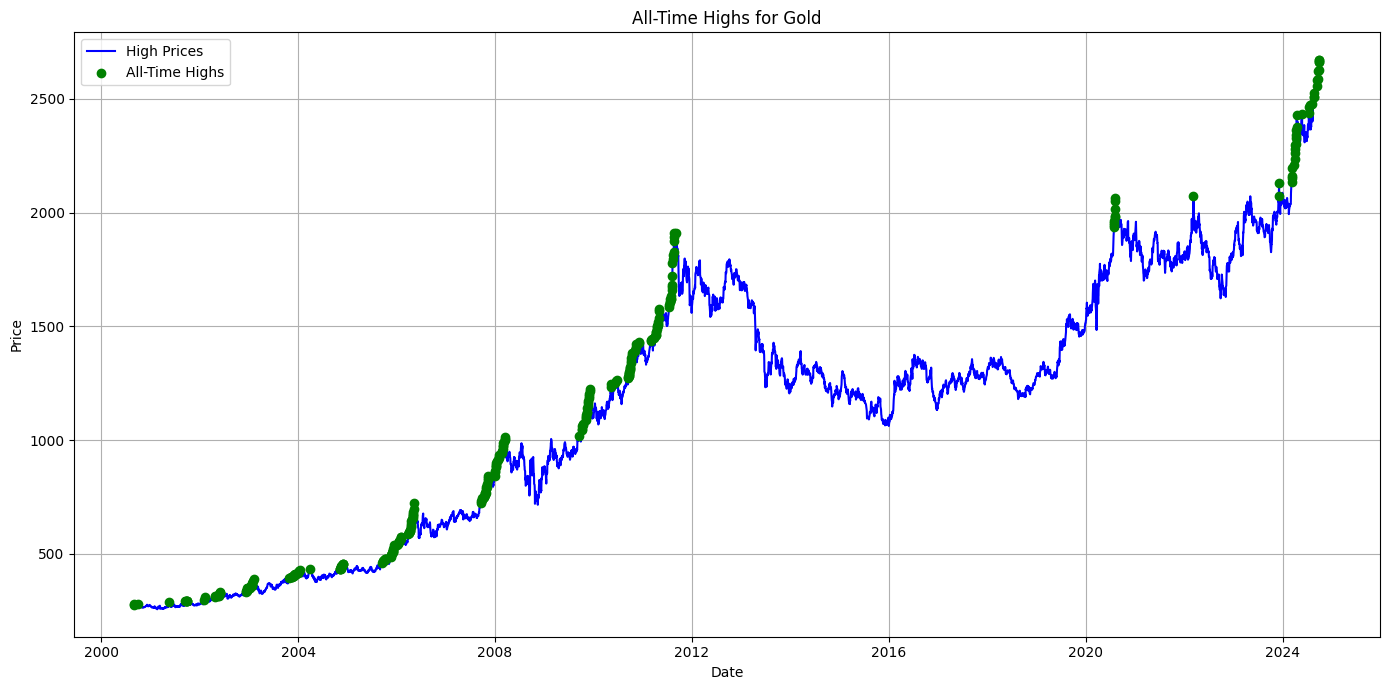

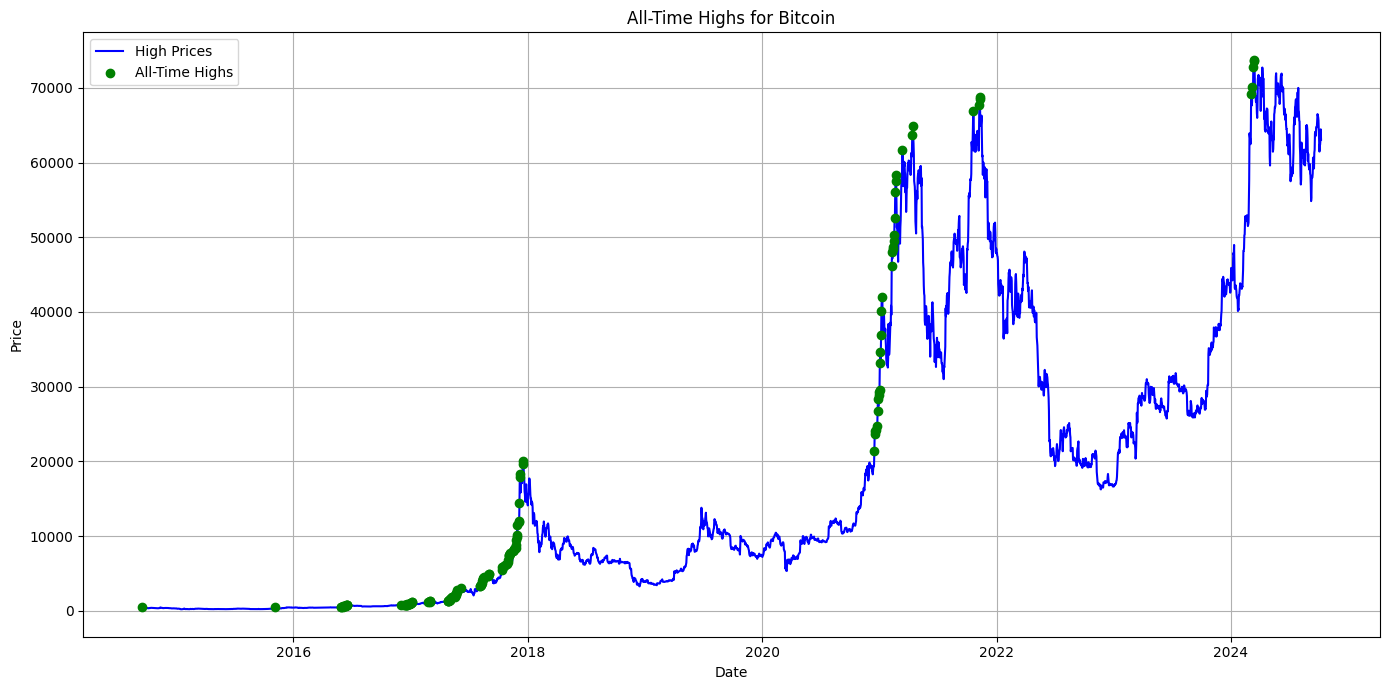

In [34]:
import matplotlib.pyplot as plt

def plot_all_time_highs(df, all_time_highs, dataset_name, high_column):
    plt.figure(figsize=(14, 7))

    # Plot the high prices over time
    plt.plot(df['Date'], df[high_column], label='High Prices', color='blue')

    # Plot all-time highs
    ath_dates = [record['Date'] for record in all_time_highs]
    ath_values = [record['All-Time High'] for record in all_time_highs]
    plt.scatter(ath_dates, ath_values, color='green', label='All-Time Highs', zorder=5)

    # Customize plot
    plt.title(f'All-Time Highs for {dataset_name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Example usage for multiple datasets
for dataset_name, df, high_column in datasets_info:
    all_time_highs = find_all_time_highs(df, high_column)

    # Plot all-time highs on top of the price data
    plot_all_time_highs(df, all_time_highs, dataset_name, high_column)


#Find all the declines 5% or more from an ATH

In [35]:
def find_declines_from_all_time_highs(df, all_time_highs, low_column, min_decline_percentage=5):
    declines = []  # To store the declines
    last_peak_value = None  # To track the last all-time high value

    for high in all_time_highs:
        peak_date = high['Date']
        peak_value = high['All-Time High']

        # Skip if we haven't reached a new all-time high
        if last_peak_value is not None and peak_value <= last_peak_value:
            continue

        # Filter the rows after the all-time high date
        post_peak_df = df[df['Date'] > peak_date]

        # Check if there are any rows after the all-time high date
        if post_peak_df.empty:
            last_peak_value = peak_value
            continue  # Skip if no rows are found after the peak date

        # Track the lowest point after the peak
        lowest_decline = post_peak_df[low_column].min()
        lowest_decline_date = post_peak_df.loc[post_peak_df[low_column].idxmin(), 'Date']

        # Calculate the percentage decline from the all-time high
        decline_percentage = (peak_value - lowest_decline) / peak_value * 100

        # Record the decline if it meets the minimum percentage requirement
        if decline_percentage >= min_decline_percentage:
            declines.append({
                'Peak Date': peak_date,
                'Peak': peak_value,
                'Low Date': lowest_decline_date,
                'Low': lowest_decline,
                'Decline Percentage': decline_percentage
            })

        last_peak_value = peak_value  # Update the last peak value

    # Check for any remaining decline after the last peak
    if last_peak_value is not None:
        # Filter data after the last peak
        remaining_decline_df = df[df['Date'] > all_time_highs[-1]['Date']]

        # Check if any data exists after the last peak
        if not remaining_decline_df.empty:
            lowest_decline = remaining_decline_df[low_column].min()
            lowest_decline_date = remaining_decline_df.loc[remaining_decline_df[low_column].idxmin(), 'Date']

            # Calculate the decline percentage from the last peak
            decline_percentage = (last_peak_value - lowest_decline) / last_peak_value * 100

            # Record if it meets the minimum percentage requirement
            if decline_percentage >= min_decline_percentage:
                declines.append({
                    'Peak Date': all_time_highs[-1]['Date'],
                    'Peak': last_peak_value,
                    'Low Date': lowest_decline_date,
                    'Low': lowest_decline,
                    'Decline Percentage': decline_percentage
                })

    return declines

def print_declines(declines, dataset_name, min_decline_percentage):
    if declines:
        print(f"Declines over {min_decline_percentage}% from all-time highs in {dataset_name}:")
        for decline in declines:
            print(f"From Peak on {decline['Peak Date']} (Peak: {decline['Peak']}) "
                  f"to Low on {decline['Low Date']} (Low: {decline['Low']}), "
                  f"Decline: {decline['Decline Percentage']:.2f}%")
    else:
        print(f"No declines over {min_decline_percentage}% found in {dataset_name}.")

# Example usage for multiple datasets
datasets_info = [
    ('SPY', df_spy, 'High', 'Low'),
    ('QQQ', df_qqq, 'High', 'Low'),
    ('Crude Oil', df_cl, 'High', 'Low'),
    ('Gold', df_gold, 'High', 'Low'),
    ('Bitcoin', df_btc, 'High', 'Low')
]

min_decline_percentage = 5  # Set your minimum decline percentage here

for dataset_name, df, high_column, low_column in datasets_info:
    # Step 1: Find all-time highs
    all_time_highs = find_all_time_highs(df, high_column)

    # Step 2: Find 5%+ declines from all-time highs
    declines = find_declines_from_all_time_highs(df, all_time_highs, low_column, min_decline_percentage)

    # Step 3: Print the declines for the current dataset
    #print_declines(declines, dataset_name, min_decline_percentage)

#Visualize ATHs with declines of 5% or more afterwards


--- Decline Details ---
Highest ATH before 5%+ decline: 45.13 on 1993-02-08 00:00:00
Ultimate Low: 42.81 on 1993-02-18T00:00:00.000000000
Total Decline: 5.14%
All-time highs higher than the ultimate low:


--- Decline Details ---
Highest ATH before 5%+ decline: 45.84 on 1993-03-11 00:00:00
Ultimate Low: 43.28 on 1993-04-26T00:00:00.000000000
Total Decline: 5.58%
All-time highs higher than the ultimate low:

  ATH on 1993-03-03 00:00:00: 45.16 (Decline %: 4.16%)
  ATH on 1993-03-04 00:00:00: 45.19 (Decline %: 4.23%)
  ATH on 1993-03-08 00:00:00: 45.75 (Decline %: 5.40%)

--- Decline Details ---
Highest ATH before 5%+ decline: 48.31 on 1994-01-31 00:00:00
Ultimate Low: 43.34 on 1994-04-04T00:00:00.000000000
Total Decline: 10.29%
All-time highs higher than the ultimate low:

  ATH on 1993-08-18 00:00:00: 45.88 (Decline %: 5.54%)
  ATH on 1993-08-24 00:00:00: 46.22 (Decline %: 6.23%)
  ATH on 1993-08-25 00:00:00: 46.44 (Decline %: 6.68%)
  ATH on 1993-08-26 00:00:00: 46.53 (Decline %: 6.86

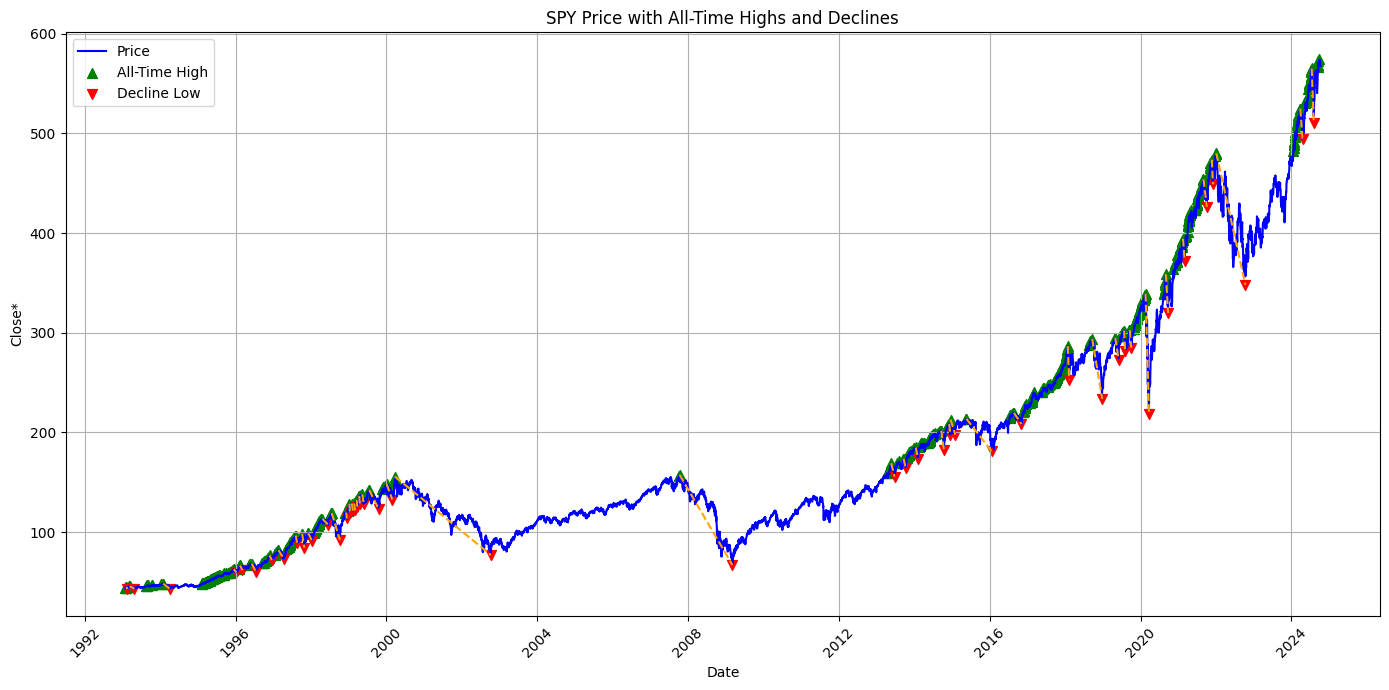

--- Decline Details ---
Highest ATH before 5%+ decline: 53.25 on 1999-03-19 00:00:00
Ultimate Low: 48.5 on 1999-03-24T00:00:00.000000000
Total Decline: 8.92%
All-time highs higher than the ultimate low:


--- Decline Details ---
Highest ATH before 5%+ decline: 56.25 on 1999-04-07 00:00:00
Ultimate Low: 48.84 on 1999-04-20T00:00:00.000000000
Total Decline: 13.17%
All-time highs higher than the ultimate low:

  ATH on 1999-03-29 00:00:00: 53.66 (Decline %: 8.98%)
  ATH on 1999-03-30 00:00:00: 54.0 (Decline %: 9.56%)
  ATH on 1999-03-31 00:00:00: 54.19 (Decline %: 9.87%)
  ATH on 1999-04-05 00:00:00: 55.58 (Decline %: 12.13%)
  ATH on 1999-04-06 00:00:00: 56.22 (Decline %: 13.13%)

--- Decline Details ---
Highest ATH before 5%+ decline: 57.28 on 1999-04-27 00:00:00
Ultimate Low: 48.94 on 1999-05-26T00:00:00.000000000
Total Decline: 14.56%
All-time highs higher than the ultimate low:

  ATH on 1999-04-26 00:00:00: 57.0 (Decline %: 14.14%)

--- Decline Details ---
Highest ATH before 5%+ dec

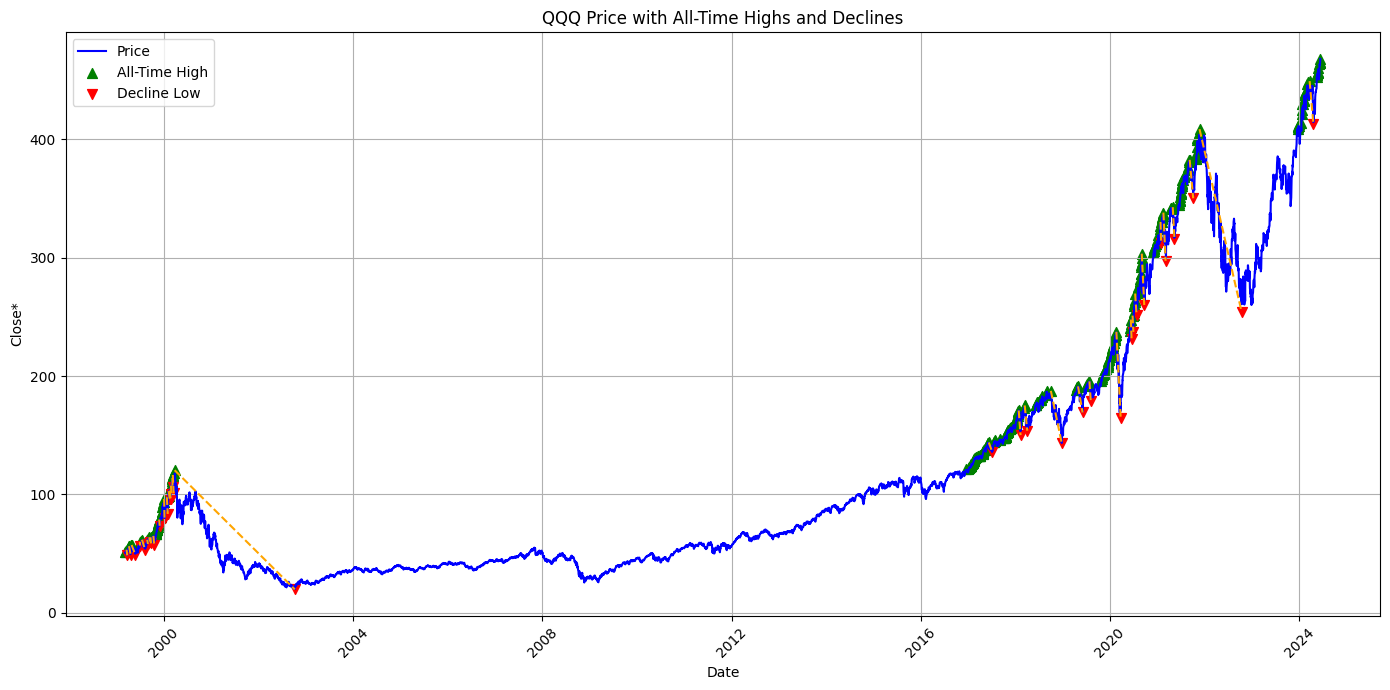

--- Decline Details ---
Highest ATH before 5%+ decline: 35.5 on 2000-09-07 00:00:00
Ultimate Low: 33.4 on 2000-09-08T00:00:00.000000000
Total Decline: 5.92%
All-time highs higher than the ultimate low:


--- Decline Details ---
Highest ATH before 5%+ decline: 35.85 on 2000-09-11 00:00:00
Ultimate Low: 33.12 on 2000-09-14T00:00:00.000000000
Total Decline: 7.62%
All-time highs higher than the ultimate low:


--- Decline Details ---
Highest ATH before 5%+ decline: 37.8 on 2000-09-20 00:00:00
Ultimate Low: 16.7 on 2001-11-19T00:00:00.000000000
Total Decline: 55.82%
All-time highs higher than the ultimate low:

  ATH on 2000-09-15 00:00:00: 36.1 (Decline %: 53.74%)
  ATH on 2000-09-18 00:00:00: 37.15 (Decline %: 55.05%)

--- Decline Details ---
Highest ATH before 5%+ decline: 39.99 on 2003-02-27 00:00:00
Ultimate Low: 25.04 on 2003-04-29T00:00:00.000000000
Total Decline: 37.38%
All-time highs higher than the ultimate low:

  ATH on 2003-02-26 00:00:00: 38.0 (Decline %: 34.11%)

--- Decline 

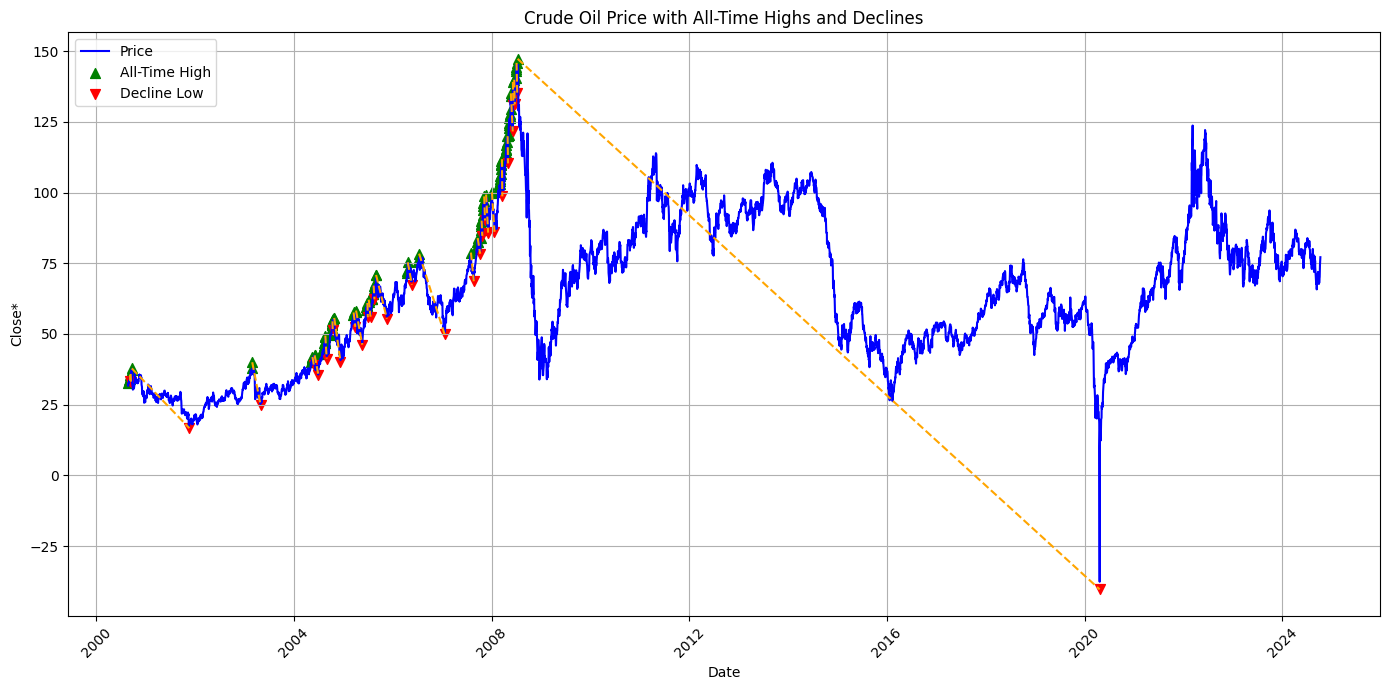

--- Decline Details ---
Highest ATH before 5%+ decline: 278.4 on 2000-09-27 00:00:00
Ultimate Low: 255.0 on 2001-02-16T00:00:00.000000000
Total Decline: 8.41%
All-time highs higher than the ultimate low:


--- Decline Details ---
Highest ATH before 5%+ decline: 287.4 on 2001-05-18 00:00:00
Ultimate Low: 263.7 on 2001-07-05T00:00:00.000000000
Total Decline: 8.25%
All-time highs higher than the ultimate low:


--- Decline Details ---
Highest ATH before 5%+ decline: 294.0 on 2001-09-28 00:00:00
Ultimate Low: 271.2 on 2001-12-10T00:00:00.000000000
Total Decline: 7.76%
All-time highs higher than the ultimate low:

  ATH on 2001-09-14 00:00:00: 290.2 (Decline %: 6.55%)
  ATH on 2001-09-19 00:00:00: 291.5 (Decline %: 6.96%)
  ATH on 2001-09-21 00:00:00: 291.9 (Decline %: 7.09%)
  ATH on 2001-09-26 00:00:00: 293.3 (Decline %: 7.53%)
  ATH on 2001-09-27 00:00:00: 293.5 (Decline %: 7.60%)

--- Decline Details ---
Highest ATH before 5%+ decline: 308.0 on 2002-02-06 00:00:00
Ultimate Low: 289.9 on

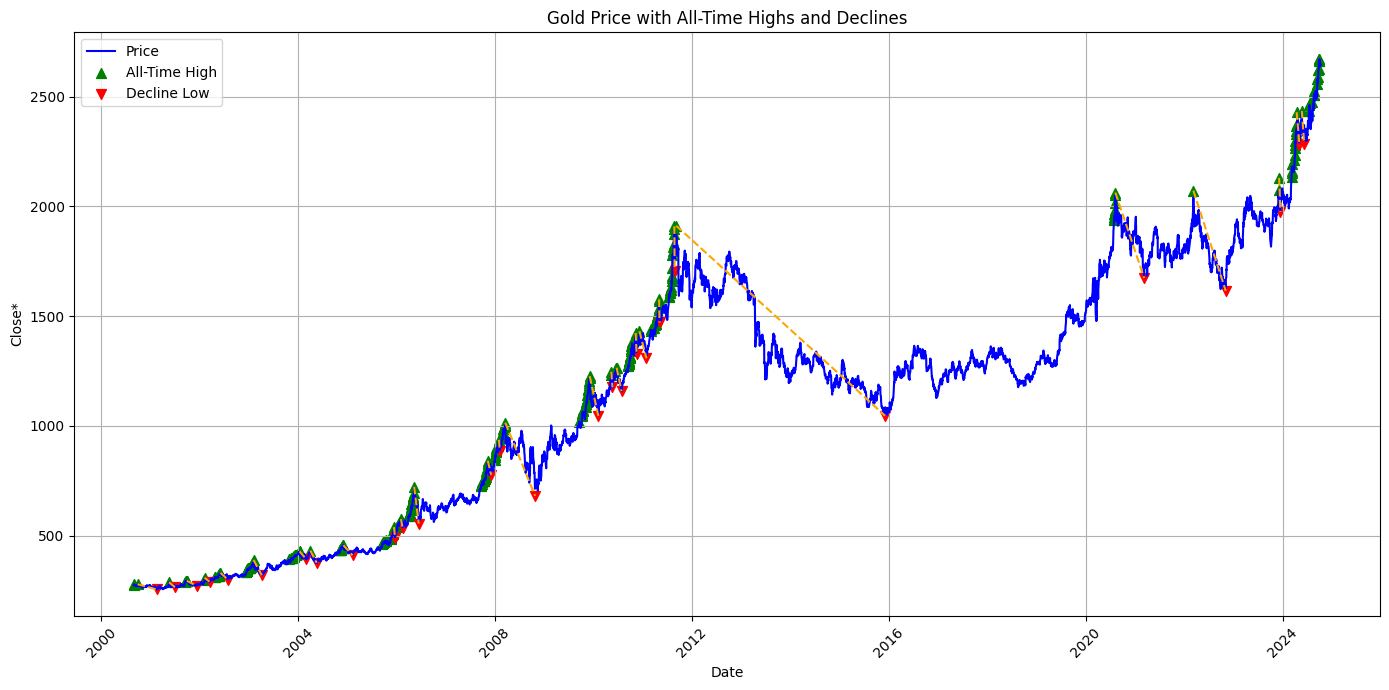

--- Decline Details ---
Highest ATH before 5%+ decline: 468.17 on 2014-09-17 00:00:00
Ultimate Low: 171.51 on 2015-01-14T00:00:00.000000000
Total Decline: 63.37%
All-time highs higher than the ultimate low:


--- Decline Details ---
Highest ATH before 5%+ decline: 495.56 on 2015-11-04 00:00:00
Ultimate Low: 301.0 on 2015-11-11T00:00:00.000000000
Total Decline: 39.26%
All-time highs higher than the ultimate low:


--- Decline Details ---
Highest ATH before 5%+ decline: 553.96 on 2016-05-29 00:00:00
Ultimate Low: 520.66 on 2016-05-31T00:00:00.000000000
Total Decline: 6.01%
All-time highs higher than the ultimate low:

  ATH on 2016-05-28 00:00:00: 533.47 (Decline %: 2.40%)

--- Decline Details ---
Highest ATH before 5%+ decline: 716.0 on 2016-06-13 00:00:00
Ultimate Low: 662.8 on 2016-06-14T00:00:00.000000000
Total Decline: 7.43%
All-time highs higher than the ultimate low:

  ATH on 2016-06-12 00:00:00: 684.84 (Decline %: 3.22%)

--- Decline Details ---
Highest ATH before 5%+ decline: 7

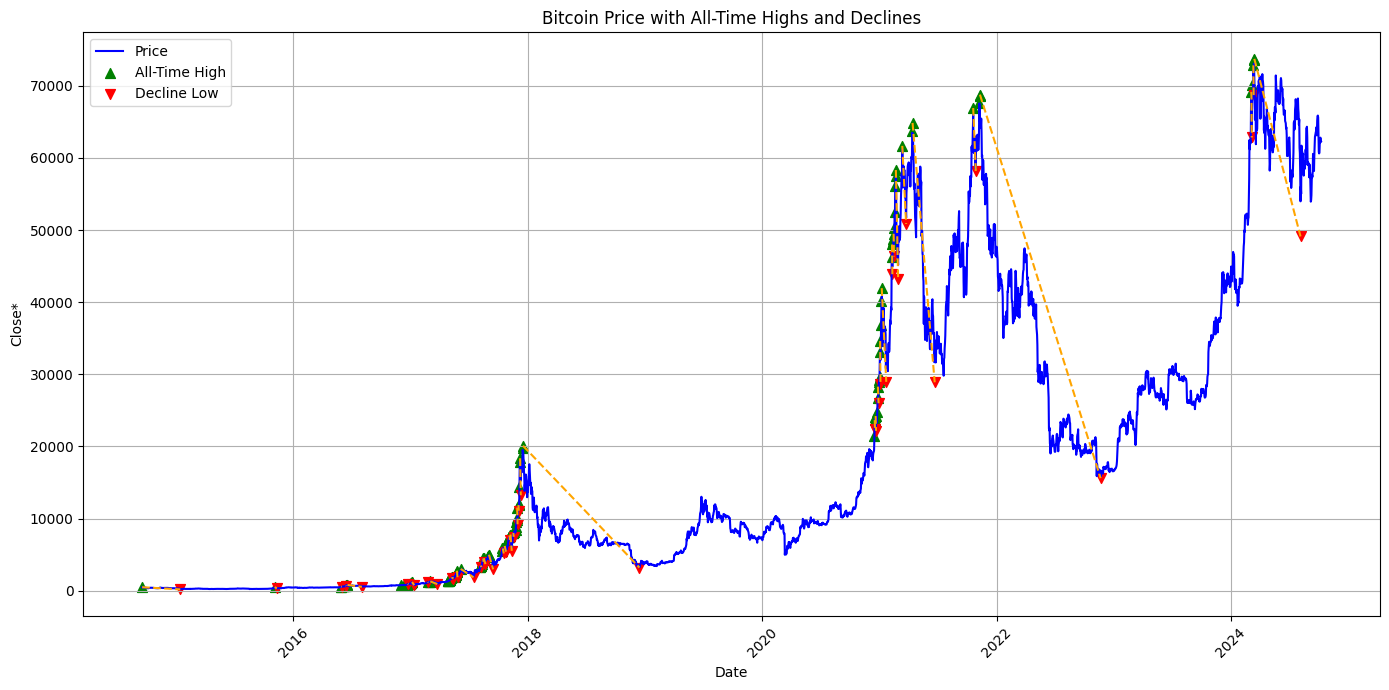

In [36]:
def connect_ath_to_declines(df, all_time_highs, min_decline_percentage=5):
    connections = []  # To store connections between ATHs and lows after 5%+ declines
    output_lines = []  # To collect all output lines for printing later
    last_peak_before_decline = None  # Track last peak before the previous decline

    for i, ath in enumerate(all_time_highs):
        current_high = ath  # Set the current ATH
        peak_date = current_high['Date']
        peak_value = current_high['All-Time High']

        # Step 1: Get data after the current ATH
        future_data = df[df['Date'] > peak_date]  # Get future data

        # Step 2: Find the next ATH (if it exists)
        next_ath = None
        for future_ath in all_time_highs[i + 1:]:
            if future_ath['Date'] > peak_date:
                next_ath = future_ath
                break

        if next_ath:
            # Get data between current ATH and the next ATH
            low_data = df[(df['Date'] > peak_date) & (df['Date'] < next_ath['Date'])]
        else:
            # If no next ATH is found, consider all remaining data
            low_data = future_data

        if not low_data.empty:
            # Step 3: Find the ultimate low in this period
            low_after_decline = low_data['Low'].min()
            low_date = low_data[low_data['Low'] == low_after_decline]['Date'].values[0]

            # Step 4: Calculate the percentage decline from the current ATH to this low
            decline_percentage = ((peak_value - low_after_decline) / peak_value) * 100

            # Step 5: If the decline is 5% or more, record it
            if decline_percentage >= min_decline_percentage:
                connections.append({
                    'Peak Date': peak_date,
                    'Peak Value': peak_value,
                    'Low Date': low_date,
                    'Low Value': low_after_decline
                })

                # Print heading for the group
                output_lines.append(f"--- Decline Details ---")
                output_lines.append(f"Highest ATH before 5%+ decline: {peak_value} on {peak_date}")
                output_lines.append(f"Ultimate Low: {low_after_decline} on {low_date}")
                output_lines.append(f"Total Decline: {decline_percentage:.2f}%")
                output_lines.append("All-time highs higher than the ultimate low:\n")

                # Find ATHs that occurred after the last peak before the previous decline
                # and before the current peak
                if last_peak_before_decline is not None:
                    for j in range(len(all_time_highs)):
                        high = all_time_highs[j]
                        if (high['Date'] > last_peak_before_decline['Date'] and
                                high['Date'] < peak_date and
                                high['All-Time High'] > low_after_decline):

                            # Calculate decline percentage from each sub-ATH to the ultimate low
                            sub_decline_percentage = ((high['All-Time High'] - low_after_decline) / high['All-Time High']) * 100

                            output_lines.append(f"  ATH on {high['Date']}: {high['All-Time High']} (Decline %: {sub_decline_percentage:.2f}%)")

                output_lines.append("")  # New line for better readability

                # Update last_peak_before_decline for the next iteration
                last_peak_before_decline = current_high

    # Print all collected output lines at once
    print("\n".join(output_lines))

    return connections

def plot_all_time_highs_and_declines(df, all_time_highs, declines, dataset_name, price_column):
    plt.figure(figsize=(14, 7))

    # Plot the price data
    plt.plot(df['Date'], df[price_column], label='Price', color='blue')

    # Plot all-time highs
    for high in all_time_highs:
        plt.scatter(high['Date'], high['All-Time High'], color='green', marker='^', s=50, label='All-Time High')

    # Plot declines
    for decline in declines:
        plt.scatter(decline['Low Date'], decline['Low Value'], color='red', marker='v', s=50, label='Decline Low')
        # Draw a line from the high to the low for better visibility
        plt.plot([decline['Peak Date'], decline['Low Date']], [decline['Peak Value'], decline['Low Value']], color='orange', linestyle='--')

    # Customizing the plot
    plt.title(f'{dataset_name} Price with All-Time Highs and Declines')
    plt.xlabel('Date')
    plt.ylabel(price_column)
    plt.xticks(rotation=45)
    plt.grid()

    # Adding legend with only unique labels
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper left')

    plt.tight_layout()
    plt.show()

# Example usage for multiple datasets
datasets_info = [
    ('SPY', df_spy, 'High', 'Low', 'Close*'),
    ('QQQ', df_qqq, 'High', 'Low', 'Close*'),
    ('Crude Oil', df_cl, 'High', 'Low', 'Close*'),
    ('Gold', df_gold, 'High', 'Low', 'Close*'),
    ('Bitcoin', df_btc, 'High', 'Low', 'Close*')
]

for dataset_name, df, high_column, low_column, price_column in datasets_info:
    # Step 1: Find all-time highs
    all_time_highs = find_all_time_highs(df, high_column)

    # Step 2: Find 5%+ declines and corresponding ultimate lows
    declines = connect_ath_to_declines(df, all_time_highs, min_decline_percentage=5)

    # Step 3: Visualize the all-time highs, declines, and ultimate low connections
    plot_all_time_highs_and_declines(df, all_time_highs, declines, dataset_name, price_column)


#Probabilities
Calculate the probabilities of seeing lower prices within a year from an ATH - 1, 2, 3, 5, 10, 15 and 20%.

Calculate the probability that we don't see a 1% lower price within a year.
Show the average opportunity cost lost after a year in the event prices never drop at least 1% below our current days price.  

Visualize the results


Decline Statistics for SPY:
1%: 10.98% --- 91.65% (total)
2%: 10.40% --- 80.67% (total)
3%: 16.40% --- 70.28% (total)
5%: 22.11% --- 53.88% (total)
10%: 10.98% --- 31.77% (total)
15%: 8.49% --- 20.79% (total)
20%: 12.30% --- 12.30% (total)
No Decline: 8.35%
Average Price Increase (No Decline): 11.61%


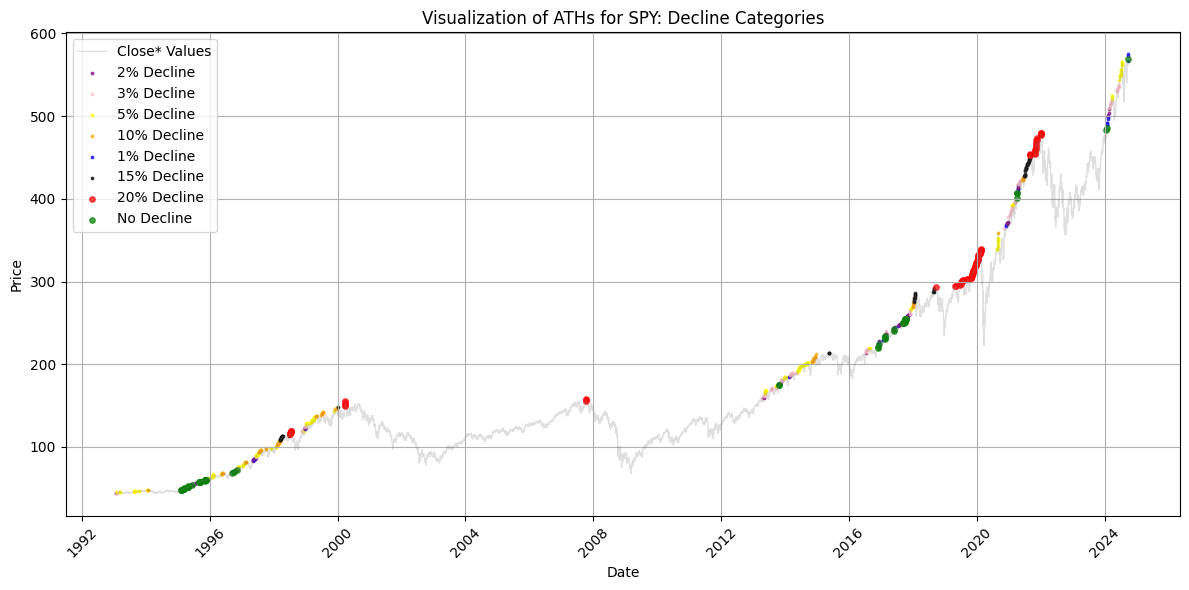


Decline Statistics for QQQ:
1%: 8.52% --- 90.66% (total)
2%: 7.42% --- 82.14% (total)
3%: 10.71% --- 74.73% (total)
5%: 14.84% --- 64.01% (total)
10%: 12.91% --- 49.18% (total)
15%: 7.97% --- 36.26% (total)
20%: 28.30% --- 28.30% (total)
No Decline: 9.34%
Average Price Increase (No Decline): 15.18%


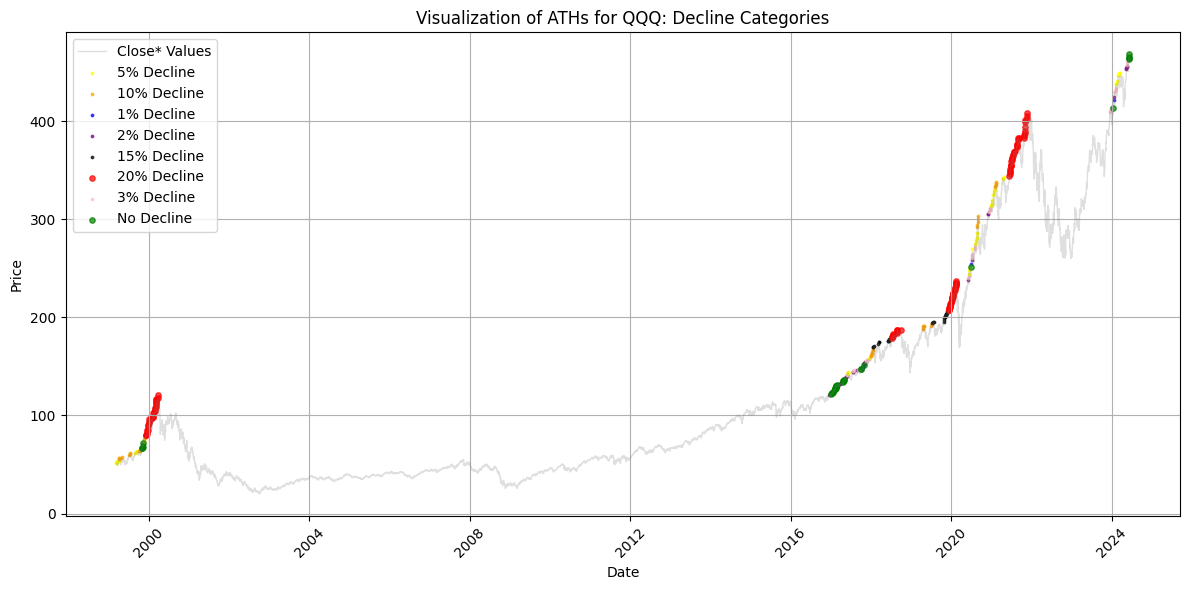


Decline Statistics for Crude Oil:
1%: 0.00% --- 100.00% (total)
2%: 2.04% --- 100.00% (total)
3%: 1.36% --- 97.96% (total)
5%: 10.88% --- 96.60% (total)
10%: 12.93% --- 85.71% (total)
15%: 10.20% --- 72.79% (total)
20%: 62.59% --- 62.59% (total)
No Decline: 0.00%


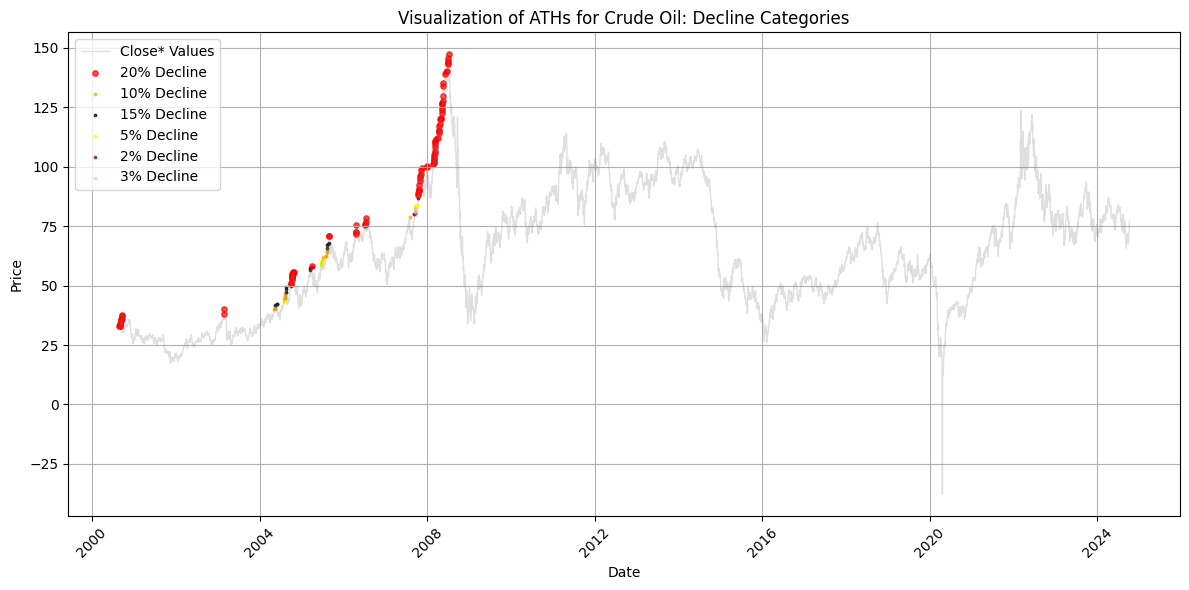


Decline Statistics for Gold:
1%: 7.41% --- 90.57% (total)
2%: 6.73% --- 83.16% (total)
3%: 15.15% --- 76.43% (total)
5%: 34.34% --- 61.28% (total)
10%: 10.77% --- 26.94% (total)
15%: 7.41% --- 16.16% (total)
20%: 8.75% --- 8.75% (total)
No Decline: 9.43%
Average Price Increase (No Decline): 10.62%


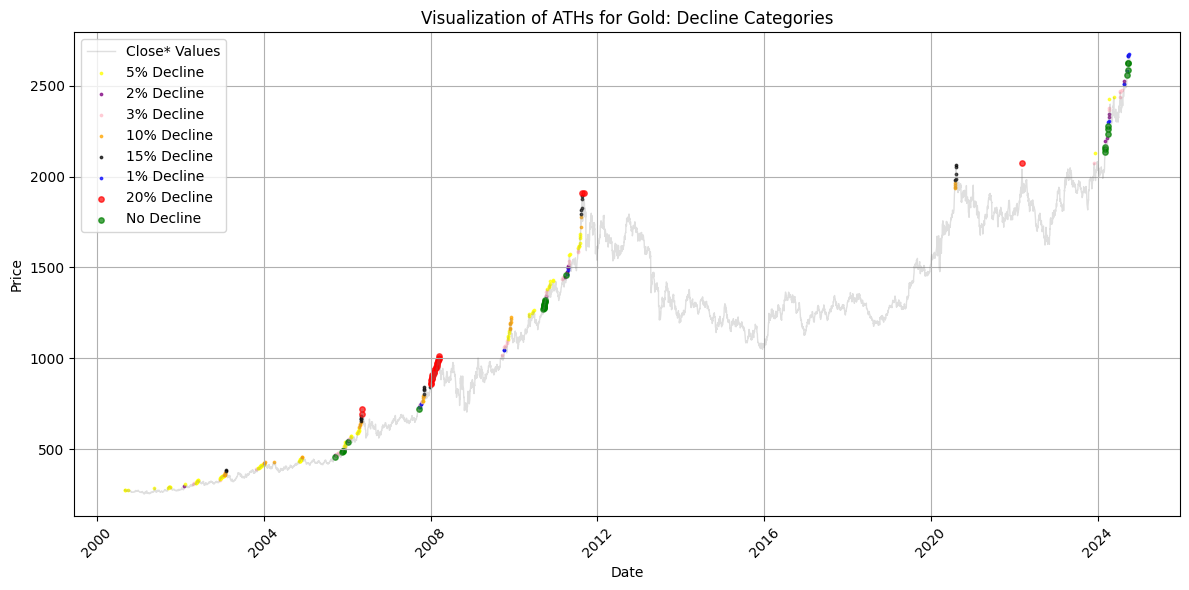


Decline Statistics for Bitcoin:
1%: 4.35% --- 97.83% (total)
2%: 2.90% --- 93.48% (total)
3%: 7.25% --- 90.58% (total)
5%: 9.42% --- 83.33% (total)
10%: 10.87% --- 73.91% (total)
15%: 4.35% --- 63.04% (total)
20%: 58.70% --- 58.70% (total)
No Decline: 2.17%
Average Price Increase (No Decline): 309.50%


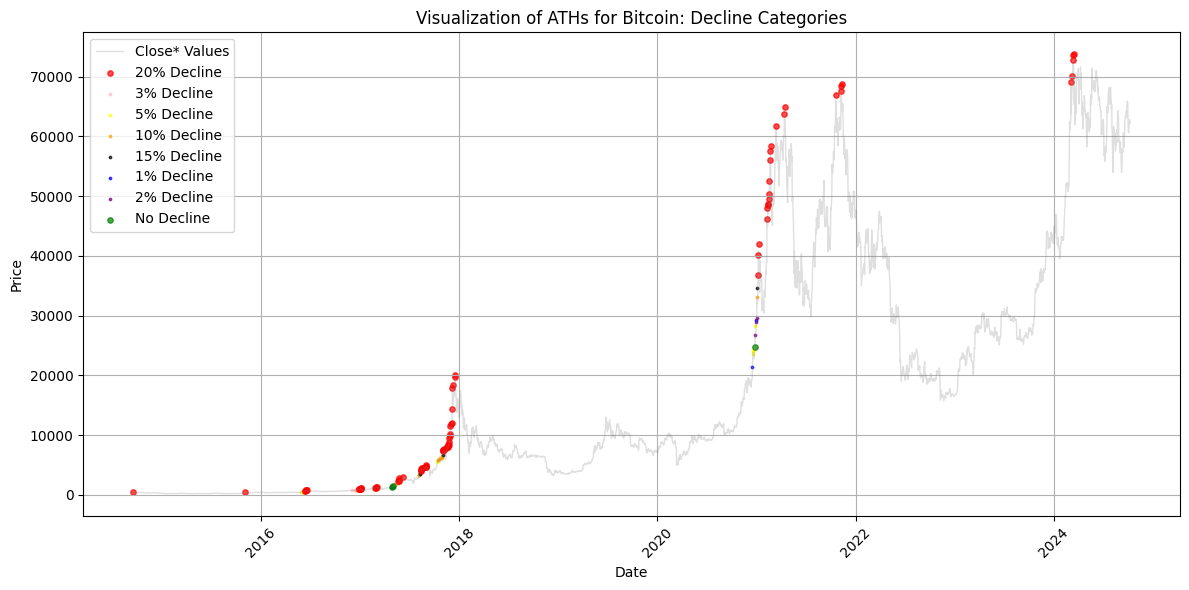

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_and_visualize_declines(datasets_info):
    for dataset_name, df, high_column, low_column, price_column in datasets_info:
        # Step 1: Find all-time highs
        all_time_highs = find_all_time_highs(df, high_column)

        # Initialize decline counts for statistics
        decline_counts = {'1%': 0, '2%': 0, '3%': 0, '5%': 0, '10%': 0, '15%': 0, '20%': 0, 'No Decline': 0, 'No Decline with Decline': 0}
        total_aths = len(all_time_highs)

        # Initialize lists to store data for visualization
        declined_aths = []
        no_decline_aths = []

        # Loop through each ATH to calculate declines in the following year
        for ath in all_time_highs:
            ath_date = ath['Date']
            ath_price = ath['All-Time High']
            label = None

            # Define the one-year period after the ATH
            one_year_later = ath_date + pd.DateOffset(years=1)
            next_year_data = df[(df['Date'] > ath_date) & (df['Date'] <= one_year_later)]

            if not next_year_data.empty:
                # Find the minimum price in the one-year period following the ATH
                min_price = next_year_data[low_column].min()
                decline_percentage = (ath_price - min_price) / ath_price * 100

                # Categorize the decline based on thresholds
                if decline_percentage >= 20:
                    decline_counts['20%'] += 1
                    label = '20% Decline'
                    color, size = 'red', 15
                elif decline_percentage >= 15:
                    decline_counts['15%'] += 1
                    label = '15% Decline'
                    color, size = 'black', 3
                elif decline_percentage >= 10:
                    decline_counts['10%'] += 1
                    label = '10% Decline'
                    color, size = 'orange', 3
                elif decline_percentage >= 5:
                    decline_counts['5%'] += 1
                    label = '5% Decline'
                    color, size = 'yellow', 3
                elif decline_percentage >= 3:
                    decline_counts['3%'] += 1
                    label = '3% Decline'
                    color, size = 'pink', 3
                elif decline_percentage >= 2:
                    decline_counts['2%'] += 1
                    label = '2% Decline'
                    color, size = 'purple', 3
                elif decline_percentage >= 1:
                    decline_counts['1%'] += 1
                    label = '1% Decline'
                    color, size = 'blue', 3
                else:
                    # Check for the case of No Decline with a decline
                    if min_price < ath_price * 0.99:
                        decline_counts['No Decline with Decline'] += 1
                        label = 'No Decline with Decline'
                        color, size = 'green', 15
                    else:
                        decline_counts['No Decline'] += 1
                        label = 'No Decline'
                        color, size = 'green', 15
            else:
                decline_counts['No Decline'] += 1
                label = 'No Decline'
                color, size = 'green', 15

            # Add to visualization lists based on decline type
            if label == 'No Decline':
                no_decline_aths.append((ath_date, ath_price, color, size, label))
            else:
                declined_aths.append((ath_date, ath_price, color, size, label))

        # Calculate cumulative decline statistics
        cumulative_decline_stats = {
            '1%': decline_counts['1%'] + decline_counts['2%'] + decline_counts['3%'] + decline_counts['5%'] + decline_counts['10%'] + decline_counts['15%'] + decline_counts['20%'],
            '2%': decline_counts['2%'] + decline_counts['3%'] + decline_counts['5%'] + decline_counts['10%'] + decline_counts['15%'] + decline_counts['20%'],
            '3%': decline_counts['3%'] + decline_counts['5%'] + decline_counts['10%'] + decline_counts['15%'] + decline_counts['20%'],
            '5%': decline_counts['5%'] + decline_counts['10%'] + decline_counts['15%'] + decline_counts['20%'],
            '10%': decline_counts['10%'] + decline_counts['15%'] + decline_counts['20%'],
            '15%': decline_counts['15%'] + decline_counts['20%'],
            '20%': decline_counts['20%']
        }

        # Print out cumulative decline statistics
        print(f"\nDecline Statistics for {dataset_name}:")
        for key in ['1%', '2%', '3%', '5%', '10%', '15%', '20%']:
            individual_percentage = (decline_counts[key] / total_aths) * 100
            cumulative_percentage = (cumulative_decline_stats[key] / total_aths) * 100
            print(f"{key}: {individual_percentage:.2f}% --- {cumulative_percentage:.2f}% (total)")

        # Calculate and print percentage for 'No Decline' and 'No Decline with Decline'
        no_decline_percentage = (decline_counts['No Decline'] / total_aths) * 100
        print(f"No Decline: {no_decline_percentage:.2f}%")

        if decline_counts['No Decline with Decline'] > 0:
            no_decline_with_decline_percentage = (decline_counts['No Decline with Decline'] / total_aths) * 100
            print(f"No Decline with Decline: {no_decline_with_decline_percentage:.2f}%")

        # Calculate average price increase for 'No Decline'
        if decline_counts['No Decline'] > 0:
            avg_price_increase_percentage = calculate_average_increase(df, all_time_highs, decline_counts['No Decline'], price_column)
            print(f"Average Price Increase (No Decline): {avg_price_increase_percentage:.2f}%")

        # Create the scatter plot
        plt.figure(figsize=(12, 6))

        # Plot the 'Close*' values for the entire dataset
        plt.plot(df['Date'], df[price_column], color='grey', alpha=0.25, label='Close* Values', linewidth=1)

        # Plot declined ATHs with specified colors and sizes
        for ath_date, ath_price, color, size, label in declined_aths:
            plt.scatter(ath_date, ath_price, color=color, alpha=0.7, s=size, label=label)

        # Plot no decline ATHs with specified color and size
        for ath_date, ath_price, color, size, label in no_decline_aths:
            plt.scatter(ath_date, ath_price, color=color, alpha=0.7, s=size, label=label)

        # Adding legend with only unique labels
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(), loc='upper left')

        # Format the plot
        plt.title(f'Visualization of ATHs for {dataset_name}: Decline Categories')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.xticks(rotation=45)
        plt.grid()
        plt.tight_layout()
        plt.show()


# Example usage for multiple datasets
datasets_info = [
    ('SPY', df_spy, 'High', 'Low', 'Close*'),
    ('QQQ', df_qqq, 'High', 'Low', 'Close*'),
    ('Crude Oil', df_cl, 'High', 'Low', 'Close*'),
    ('Gold', df_gold, 'High', 'Low', 'Close*'),
    ('Bitcoin', df_btc, 'High', 'Low', 'Close*')
]

# Call the function
analyze_and_visualize_declines(datasets_info)


#VIX ANALYSIS

In [49]:
import pandas as pd

# Assuming df_spy and df_vix are already defined DataFrames
# Convert the date column to datetime (if not already done)
df_spy['Date'] = pd.to_datetime(df_spy['Date'])  # Ensure 'Date' column in df_spy is in datetime format
df_vix['Date'] = pd.to_datetime(df_vix['Date'])  # Ensure 'Date' column in df_vix is in datetime format

# Merge the datasets on the date column
merged_df = pd.merge(df_spy, df_vix, on='Date', how='outer')  # Use 'outer' to include all dates

# Rename columns
merged_df.rename(columns={
    'Close*': 'Close_spy',  # Rename 'Close*' to 'Close_spy'
    'Close': 'Close_vix',    # Rename 'Close' to 'Close_vix'
    'Open_x': 'Open_spy',    # Rename other columns as needed
    'High_x': 'High_spy',
    'Low_x': 'Low_spy',
    'Open_y': 'Open_vix',
    'High_y': 'High_vix',
    'Low_y': 'Low_vix',
    'AdjClose': 'AdjClose_vix'
}, inplace=True)

# Drop rows where Close_spy or High_vix have missing values
merged_df.dropna(subset=['Close_spy', 'High_vix'], inplace=True)

# Count rows with missing values
missing_values_count = merged_df.isnull().sum()

# Display the updated DataFrame and the count of missing values
print(merged_df)
print("\nCount of missing values in each column:")
print(missing_values_count)

           Date  Open_spy  High_spy  Low_spy  Close_spy      Volume  \
764  1993-01-29     43.97     43.97    43.75      43.94   1,003,200   
765  1993-02-01     43.97     44.25    43.97      44.25     480,500   
766  1993-02-02     44.22     44.38    44.13      44.34     201,300   
767  1993-02-03     44.41     44.84    44.38      44.81     529,400   
768  1993-02-04     44.97     45.09    44.47      45.00     531,500   
...         ...       ...       ...      ...        ...         ...   
8817 2024-09-19    571.01    572.88   568.08     570.98  75,315,500   
8818 2024-09-20    567.84    569.31   565.17     568.25  77,503,100   
8819 2024-09-23    569.34    570.33   568.10     569.67  44,116,900   
8820 2024-09-24    570.48    571.36   567.60     571.30  46,805,700   
8821 2024-09-25    571.14    571.89   568.91     570.04  38,428,600   

      Normalized  Open_vix  High_vix  Low_vix  Close_vix  AdjClose_vix  
764          NaN     12.49     13.16    12.42      12.42         12.42  
7

Events where High_vix > 40 (with previous day's High_vix < {vix_high}):
Date: 1997-10-28, Close_spy: 92.22, High_vix: 48.64
Date: 1998-08-31, Close_spy: 96.0, High_vix: 45.02
Date: 1998-09-10, Close_spy: 98.5, High_vix: 46.56
Date: 1998-10-05, Close_spy: 98.69, High_vix: 45.56
Date: 1998-10-08, Close_spy: 96.59, High_vix: 49.53
Date: 2001-09-21, Close_spy: 97.28, High_vix: 49.35
Date: 2002-07-23, Close_spy: 79.95, High_vix: 46.13
Date: 2002-08-05, Close_spy: 83.77, High_vix: 45.21
Date: 2008-09-29, Close_spy: 111.38, High_vix: 48.4
Date: 2008-10-02, Close_spy: 111.85, High_vix: 46.48
Date: 2008-12-29, Close_spy: 86.91, High_vix: 46.24
Date: 2009-01-12, Close_spy: 86.95, High_vix: 46.62
Date: 2009-01-30, Close_spy: 82.83, High_vix: 45.53
Date: 2009-02-05, Close_spy: 84.57, High_vix: 46.23
Date: 2009-02-09, Close_spy: 87.1, High_vix: 45.45
Date: 2009-02-17, Close_spy: 79.22, High_vix: 51.18
Date: 2009-03-20, Close_spy: 76.71, High_vix: 47.63
Date: 2009-03-30, Close_spy: 78.79, High_vix: 

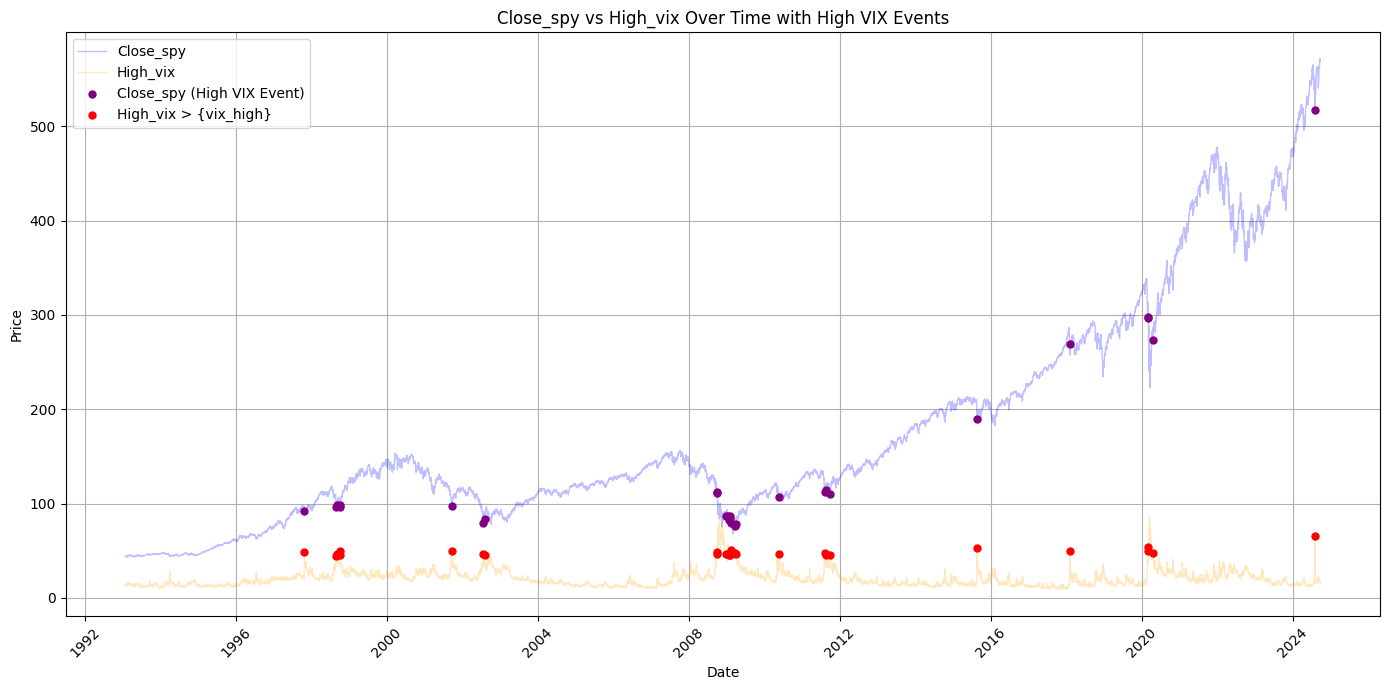

In [85]:
vix_high = 45

# Create a shifted column for High_vix to get the previous day's value
merged_df['Prev_High_vix'] = merged_df['High_vix'].shift(1)

# Filter for events where High_vix > 40 and previous day's High_vix < 40
high_vix_events = merged_df[(merged_df['High_vix'] > vix_high) & (merged_df['Prev_High_vix'] < vix_high)]

# Print out the events
if not high_vix_events.empty:
    print("Events where High_vix > 40 (with previous day's High_vix < {vix_high}):")
    for index, row in high_vix_events.iterrows():
        print(f"Date: {row['Date'].date()}, Close_spy: {row['Close_spy']}, High_vix: {row['High_vix']}")

# Plotting
plt.figure(figsize=(14, 7))

# Plot Close_spy
plt.plot(merged_df['Date'], merged_df['Close_spy'], label='Close_spy', color='blue', linewidth=1, alpha=0.25)

# Plot High_vix
plt.plot(merged_df['Date'], merged_df['High_vix'], label='High_vix', color='orange', linewidth=1, alpha=0.25)

# Highlight events where High_vix > 40
plt.scatter(high_vix_events['Date'], high_vix_events['Close_spy'], color='purple', s=25, label='Close_spy (High VIX Event)', zorder=5)
plt.scatter(high_vix_events['Date'], high_vix_events['High_vix'], color='red', s=25, label='High_vix > {vix_high}', zorder=5)

# Customize the plot
plt.title('Close_spy vs High_vix Over Time with High VIX Events')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show plot
plt.tight_layout()
plt.show()


#EXPERIMENT

Invest every month, or invest 1/2 every month, and save half for a VIX spike

First, let's merge the datasets and create new columns

In [78]:
import pandas as pd

# Assuming merged_df is already defined
# Create a copy of merged_df
merged_df2 = merged_df.copy()

# Initialize new columns with default values
merged_df2['Shares_bought'] = 0  # or any default value you prefer
merged_df2['Shares_Acc'] = 0      # or any default value you prefer

# Display the new DataFrame with added columns
#print(merged_df2.head())


#Populate those new columns

In [79]:
# Assuming merged_df2 is already defined
merged_df2 = merged_df.copy()

# Initialize new columns with default values and set them to float type
merged_df2['Shares_bought'] = 0.0  # Use float for compatibility with float values
merged_df2['Shares_Acc'] = 0.0     # Use float for compatibility with cumulative sum

# Convert 'Date' column to datetime if not already done
merged_df2['Date'] = pd.to_datetime(merged_df2['Date'])

# Get the earliest day of each month
earliest_dates = merged_df2.groupby(merged_df2['Date'].dt.to_period('M'))['Date'].min()

# Update 'Shares_bought' for those earliest dates
for date in earliest_dates:
    if date == pd.Timestamp('1993-01-29'):  # Skip this specific date
        continue

    date_row = merged_df2[merged_df2['Date'] == date]  # Use date directly
    if not date_row.empty:
        close_spy_value = date_row['Close_spy'].values[0]  # Get the Close_spy value
        if close_spy_value != 0:  # Prevent division by zero
            shares_bought_value = 1000 / close_spy_value
            merged_df2.loc[merged_df2['Date'] == date, 'Shares_bought'] = shares_bought_value

# Calculate the cumulative sum of 'Shares_bought' to get 'Shares_Acc'
merged_df2['Shares_Acc'] = merged_df2['Shares_bought'].cumsum()

# Display the updated DataFrame
#print(merged_df2.head(25))


#Invest $1,000 at the beginning of every month

We assume we have $12,000 to invest every year

In [80]:
# Count the number of times shares were bought
num_purchases = (merged_df2['Shares_bought'] > 0).sum()

# Get the last row of merged_df2
final_row = merged_df2.iloc[-1]

# Extract the final Shares_Acc and Close_spy values
final_shares_acc = final_row['Shares_Acc']
final_close_spy = final_row['Close_spy']
final_value = final_close_spy * final_shares_acc
invested_value = num_purchases * 1000
total_gain = (final_value - invested_value) / invested_value * 100

# Get the date range in years for proper yearly return calculation
first_purchase_date = merged_df2[merged_df2['Shares_bought'] > 0]['Date'].iloc[0]
last_date = merged_df2['Date'].iloc[-1]
years_invested = (last_date - first_purchase_date).days / 365

# Calculate annualized return
annualized_return = ((final_value / invested_value) ** (1 / years_invested) - 1) * 100

# Display the results
print("$1000 invested every month")
print("-----------------------------------------------------")
print(f"Number of times shares were bought: {num_purchases}")
print(f"Total amount invested: ${num_purchases * 1000}")
print(f"Final Shares Accumulated: {final_shares_acc}")
print(f"Final Close_spy Value: ${final_close_spy}")
print(f"Final Value of shares: ${final_value}")
print(f"Percent Gain: {total_gain:.2f}%")
print(f"Annualized Return: {annualized_return:.2f}% over {years_invested:.2f} years")

$1000 invested every month
-----------------------------------------------------
Number of times shares were bought: 383
Total amount invested: $383000
Final Shares Accumulated: 3121.696541164334
Final Close_spy Value: $570.04
Final Value of shares: $1779491.896325317
Percent Gain: 364.62%
Annualized Return: 4.97% over 31.67 years


#Split the investment

Invest $500 at the beginning of each month BUT...

Save $500 each month to make a lump sum purchase if the VIX goes above 40

In [81]:
import pandas as pd

# Assuming merged_df2 is already defined with columns 'Date', 'Close_spy', and 'High_vix'
# Create merged_df3 as a copy of merged_df2
merged_df3 = merged_df2.copy()

# Initialize new columns in merged_df3
merged_df3['save_vix'] = 0.0
merged_df3['money_bank'] = 0.0
merged_df3['shares_vix'] = 0.0
merged_df3['shares_vix_acc'] = 0.0

# Convert 'Date' column to datetime if necessary
merged_df3['Date'] = pd.to_datetime(merged_df3['Date'])

# Identify the earliest date of each month, excluding Jan 29, 1993
earliest_dates = merged_df3.groupby(merged_df3['Date'].dt.to_period('M'))['Date'].min()
earliest_dates = earliest_dates[earliest_dates != pd.Timestamp('1993-01-29')]

# Set 'save_vix' to $500 on the first day of each month (excluding Jan 29, 1993)
for date in earliest_dates:
    merged_df3.loc[merged_df3['Date'] == date, 'save_vix'] = 500

# Calculate 'money_bank' as the cumulative sum of 'save_vix'
merged_df3['money_bank'] = merged_df3['save_vix'].cumsum()

# Set 'shares_vix' to $500 divided by 'Close_spy' on the first day of each month
for date in earliest_dates:
    close_spy_value = merged_df3.loc[merged_df3['Date'] == date, 'Close_spy'].values[0]
    merged_df3.loc[merged_df3['Date'] == date, 'shares_vix'] = 500 / close_spy_value

# Apply logic for VIX > 40 after being <= 40 on the previous day
for idx in range(1, len(merged_df3)):
    # Check if current day VIX high is greater than 40 and previous day's VIX high was <= 40
    if merged_df3.iloc[idx]['High_vix'] > 40 and merged_df3.iloc[idx - 1]['High_vix'] <= 40:
        # Spend the entire money_bank on shares on the same day that high_vix > 40
        money_bank = merged_df3.iloc[idx]['money_bank']
        close_spy_value = merged_df3.iloc[idx]['Close_spy']

        if money_bank > 0:
            # Calculate the number of shares bought with the entire money_bank
            shares_bought_with_bank = money_bank / close_spy_value
            merged_df3.loc[merged_df3.index[idx], 'shares_vix'] = shares_bought_with_bank

            # Reset money_bank to zero the next day
            merged_df3.loc[merged_df3.index[idx + 1:], 'money_bank'] -= money_bank

# Calculate the cumulative shares in 'shares_vix_acc'
merged_df3['shares_vix_acc'] = merged_df3['shares_vix'].cumsum()

# Display the last few rows to confirm the results
#print(merged_df3.tail(50))

#Comparison

Looks like the opportunity cost of staying in cash outweights the benefit of waiting for better prices

---



In [82]:
# Define the fixed investment amount
invested_value_vix = 383000

# Get the last row of merged_df3
final_row_vix = merged_df3.iloc[-1]

# Extract the final shares_vix_acc and Close_spy values
final_shares_vix_acc = final_row_vix['shares_vix_acc']
final_close_spy_vix = final_row_vix['Close_spy']
final_value_vix = final_shares_vix_acc * final_close_spy_vix

# Calculate total gain percentage
total_gain_vix = (final_value_vix - invested_value_vix) / invested_value_vix * 100

# Get the date range in years for proper yearly return calculation
first_purchase_date_vix = merged_df3[merged_df3['shares_vix'] > 0]['Date'].iloc[0]
last_date_vix = merged_df3['Date'].iloc[-1]
years_invested_vix = (last_date_vix - first_purchase_date_vix).days / 365

# Calculate annualized return
annualized_return_vix = ((final_value_vix / invested_value_vix) ** (1 / years_invested_vix) - 1) * 100

# Display the results
print("$500 invested every month - $500 saved for VIX over 40")
print("-----------------------------------------------------")
print(f"Final Shares Accumulated (shares_vix_acc): {final_shares_vix_acc}")
print(f"Final Close_spy Value: ${final_close_spy_vix}")
print(f"Final Value of Shares: ${final_value_vix}")
print(f"Percent Gain: {total_gain_vix:.2f}%")
print(f"Annualized Return: {annualized_return_vix:.2f}% over {years_invested_vix:.2f} years")

print(f"")
print("$1000 invested every month")
print("-----------------------------------------------------")
print(f"Number of times shares were bought: {num_purchases}")
print(f"Total amount invested: ${num_purchases * 1000}")
print(f"Final Shares Accumulated: {final_shares_acc}")
print(f"Final Close_spy Value: ${final_close_spy}")
print(f"Final Value of shares: ${final_value}")
print(f"Percent Gain: {total_gain:.2f}%")
print(f"Annualized Return: {annualized_return:.2f}% over {years_invested:.2f} years")

$500 invested every month - $500 saved for VIX over 40
-----------------------------------------------------
Final Shares Accumulated (shares_vix_acc): 2924.120272232447
Final Close_spy Value: $570.04
Final Value of Shares: $1666865.519983384
Percent Gain: 335.21%
Annualized Return: 4.75% over 31.67 years

$1000 invested every month
-----------------------------------------------------
Number of times shares were bought: 383
Total amount invested: $383000
Final Shares Accumulated: 3121.696541164334
Final Close_spy Value: $570.04
Final Value of shares: $1779491.896325317
Percent Gain: 364.62%
Annualized Return: 4.97% over 31.67 years


#For varying VIX levels

In [86]:
import pandas as pd

# Define the VIX threshold
vix_threshold = 45

# Assuming merged_df2 is already defined with columns 'Date', 'Close_spy', and 'High_vix'
# Create merged_df4 as a copy of merged_df2
merged_df4 = merged_df2.copy()

# Initialize new columns in merged_df4
merged_df4['save_vix'] = 0.0
merged_df4['money_bank'] = 0.0
merged_df4['shares_vix'] = 0.0
merged_df4['shares_vix_acc'] = 0.0

# Convert 'Date' column to datetime if necessary
merged_df4['Date'] = pd.to_datetime(merged_df4['Date'])

# Identify the earliest date of each month, excluding Jan 29, 1993
earliest_dates = merged_df4.groupby(merged_df4['Date'].dt.to_period('M'))['Date'].min()
earliest_dates = earliest_dates[earliest_dates != pd.Timestamp('1993-01-29')]

# Set 'save_vix' to $500 on the first day of each month (excluding Jan 29, 1993)
for date in earliest_dates:
    merged_df4.loc[merged_df4['Date'] == date, 'save_vix'] = 500

# Calculate 'money_bank' as the cumulative sum of 'save_vix'
merged_df4['money_bank'] = merged_df4['save_vix'].cumsum()

# Set 'shares_vix' to $500 divided by 'Close_spy' on the first day of each month
for date in earliest_dates:
    close_spy_value = merged_df4.loc[merged_df4['Date'] == date, 'Close_spy'].values[0]
    merged_df4.loc[merged_df4['Date'] == date, 'shares_vix'] = 500 / close_spy_value

# Apply logic for VIX > vix_threshold after being <= vix_threshold on the previous day
for idx in range(1, len(merged_df4)):
    # Check if current day VIX high is greater than vix_threshold and previous day's VIX high was <= vix_threshold
    if merged_df4.iloc[idx]['High_vix'] > vix_threshold and merged_df4.iloc[idx - 1]['High_vix'] <= vix_threshold:
        # Spend the entire money_bank on shares on the same day that High_vix > vix_threshold
        money_bank = merged_df4.iloc[idx]['money_bank']
        close_spy_value = merged_df4.iloc[idx]['Close_spy']

        if money_bank > 0:
            # Calculate the number of shares bought with the entire money_bank
            shares_bought_with_bank = money_bank / close_spy_value
            merged_df4.loc[merged_df4.index[idx], 'shares_vix'] = shares_bought_with_bank

            # Reset money_bank to zero the next day
            merged_df4.loc[merged_df4.index[idx + 1:], 'money_bank'] -= money_bank

# Calculate the cumulative shares in 'shares_vix_acc'
merged_df4['shares_vix_acc'] = merged_df4['shares_vix'].cumsum()

# Display the last few rows to confirm the results
#print(merged_df4.tail(50))

# Define the fixed investment amount
invested_value_vix = 383000

# Get the last row of merged_df4
final_row_vix = merged_df4.iloc[-1]

# Extract the final shares_vix_acc and Close_spy values
final_shares_vix_acc = final_row_vix['shares_vix_acc']
final_close_spy_vix = final_row_vix['Close_spy']
final_value_vix = final_shares_vix_acc * final_close_spy_vix

# Calculate total gain percentage
total_gain_vix = (final_value_vix - invested_value_vix) / invested_value_vix * 100

# Get the date range in years for proper yearly return calculation
first_purchase_date_vix = merged_df4[merged_df4['shares_vix'] > 0]['Date'].iloc[0]
last_date_vix = merged_df4['Date'].iloc[-1]
years_invested_vix = (last_date_vix - first_purchase_date_vix).days / 365

# Calculate annualized return
annualized_return_vix = ((final_value_vix / invested_value_vix) ** (1 / years_invested_vix) - 1) * 100

# Display the results
print(f"$500 invested every month - $500 saved for VIX over {vix_threshold}")
print("-----------------------------------------------------")
print(f"Final Shares Accumulated (shares_vix_acc): {final_shares_vix_acc}")
print(f"Final Close_spy Value: ${final_close_spy_vix:.2f}")
print(f"Final Value of Shares: ${final_value_vix:.2f}")
print(f"Percent Gain: {total_gain_vix:.2f}%")
print(f"Annualized Return: {annualized_return_vix:.2f}% over {years_invested_vix:.2f} years")

# Additional section for $1000 invested every month (assuming relevant calculations exist)
# Replace `num_purchases`, `final_shares_acc`, `final_close_spy`, `final_value`, `total_gain`, and `annualized_return`
# with the relevant variables from your previous code or context

print(f"\n$1000 invested every month")
print("-----------------------------------------------------")
print(f"Total amount invested: ${invested_value_vix}")
print(f"Final Shares Accumulated: {final_shares_acc}")
print(f"Final Close_spy Value: ${final_close_spy:.2f}")
print(f"Final Value of shares: ${final_value:.2f}")
print(f"Percent Gain: {total_gain:.2f}%")
print(f"Annualized Return: {annualized_return:.2f}% over {years_invested:.2f} years")


$500 invested every month - $500 saved for VIX over 45
-----------------------------------------------------
Final Shares Accumulated (shares_vix_acc): 2959.0251726382107
Final Close_spy Value: $570.04
Final Value of Shares: $1686762.71
Percent Gain: 340.41%
Annualized Return: 4.79% over 31.67 years

$1000 invested every month
-----------------------------------------------------
Total amount invested: $383000
Final Shares Accumulated: 3121.696541164334
Final Close_spy Value: $570.04
Final Value of shares: $1779491.90
Percent Gain: 364.62%
Annualized Return: 4.97% over 31.67 years
